<a href="https://colab.research.google.com/github/mhoangvslev/FedShop/blob/main/FedShop_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FedShop : The Federated Shop Benchmark

[FedShop](https://github.com/mhoangvslev/FedShop) is a synthetic RDF Federated Benchmark designed for scalability. It evaluates the performances of SPARQL federated query engines such as FedX ,CostFed, Semagrow, Splendid (etc) when the number of sources grows. FedShop is based on a E-commerce scenario with e-shops and e-rating-sites as in BSBM. Compared to BSBM, each shop and rating-site of FedShop has its own SPARQL endpoint and share a common catalog of products. Following the BSBM idea, the FedShop queries simulates a user navigating the Federated shop as a single virtual shop. The scaling factor is obtained by adding more and more shops and rating-sites within the federation. In FedShop, we are able to observe the performances of federated queries when the number of source is increasing.

This notebook helps compare the performance of difference Federated Query Engines.

## Basic statistics

- Number of entities per batch and per class:

|class                                                                   |nb_entities_batch0|nb_entities_batch1|nb_entities_batch2|nb_entities_batch3|nb_entities_batch4|nb_entities_batch5|nb_entities_batch6|nb_entities_batch7|nb_entities_batch8|nb_entities_batch9|
|------------------------------------------------------------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|------------------|
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/RatingSite    |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Review        |38019             |91491             |140311            |191293            |237941            |294250            |350990            |410791            |460314            |510378            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Vendor        |10                |20                |30                |40                |50                |60                |70                |80                |90                |100               |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Product       |47843             |111555            |168837            |230648            |287426            |352208            |417554            |485339            |543518            |602551            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Person        |3617              |8036              |12443             |15811             |20734             |25812             |29650             |33799             |37917             |42606             |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Offer         |10692             |22388             |32174             |44415             |55637             |65726             |75932             |85814             |95738             |105971            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductType   |18536             |37552             |56308             |75324             |94167             |113032            |131852            |150600            |169395            |188142            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/Producer      |26535             |57739             |86666             |117644            |147517            |178088            |208786            |239432            |268764            |298152            |
|http://www4.wiwiss.fu-berlin.de/bizer/bsbm/v01/vocabulary/ProductFeature|246546            |538797            |807782            |1096861           |1374432           |1659890           |1946383           |2232466           |2505337           |2780151           |

- Overall:

|         |batch0      |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7       |batch8       |batch9       |
|---------------|------------|------------|------------|------------|------------|------------|------------|-------------|-------------|-------------|
|nquads         |5220158.0   |11943444.0  |18037035.0  |24587132.0  |30689322.0  |37466452.0  |44284278.0  |51295174.0   |57477556.0   |63739069.0   |
|size           |1039693420.0|2398634640.0|3632620984.0|4954876025.0|6186864283.0|7557497672.0|8935617443.0|10356308285.0|11607328985.0|12876160900.0|
|size_simplified|991.53 MB   |2.23 GB     |3.38 GB     |4.61 GB     |5.76 GB     |7.04 GB     |8.32 GB     |9.65 GB      |10.81 GB     |11.99 GB     |


- Vendor dataset:

|         |batch0     |batch1     |batch2     |batch3      |batch4      |batch5      |batch6      |batch7      |batch8      |batch9      |
|---------------|-----------|-----------|-----------|------------|------------|------------|------------|------------|------------|------------|
|nquads         |1286796.0  |2686540.0  |3879987.0  |5337135.0   |6680977.0   |7905470.0   |9142675.0   |10336969.0  |11542209.0  |12776987.0  |
|size           |243520766.0|511711300.0|740304381.0|1019471482.0|1276922095.0|1511516560.0|1748665441.0|1977472053.0|2208482672.0|2445026463.0|
|size_simplified|232.24 MB  |488.01 MB  |706.01 MB  |972.24 MB   |1.19 GB     |1.41 GB     |1.63 GB     |1.84 GB     |2.06 GB     |2.28 GB     |

- RatingSite dataset:

|         |batch0     |batch1      |batch2      |batch3      |batch4      |batch5      |batch6      |batch7      |batch8      |batch9       |
|---------------|-----------|------------|------------|------------|------------|------------|------------|------------|------------|-------------|
|nquads         |3933362.0  |9256904.0   |14157048.0  |19249997.0  |24008345.0  |29560982.0  |35141603.0  |40958205.0  |45935347.0  |50962082.0   |
|size           |796172654.0|1886923340.0|2892316603.0|3935404543.0|4909942188.0|6045981112.0|7186952002.0|8378836232.0|9398846313.0|10431134437.0|
|size_simplified|759.29 MB  |1.76 GB     |2.69 GB     |3.67 GB     |4.57 GB     |5.63 GB     |6.69 GB     |7.8 GB      |8.75 GB     |9.71 GB      |





# Preliminaries

# Download the benchmark

In [ ]:
!pip install --quiet gdown==4.5.4 --no-cache-dir

In [ ]:
!rm -rf /content/benchmark/generation gen-model.zip
!gdown 1mQl8yy3ZKJP7WIncUkvlZW3sKlnpg-w2 -O gen-model.zip
!unzip -oq gen-model.zip

Downloading...
From: https://drive.google.com/uc?id=1mQl8yy3ZKJP7WIncUkvlZW3sKlnpg-w2
To: /content/gen-model.zip
100% 64.5M/64.5M [00:00<00:00, 78.7MB/s]


# Dependencies

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from scipy import stats

def linear_regression(row):
    data = generation_metrics.query(f'`query` == {repr(row["query"])}')
    distinct_slope,  distinct_intercept, _, _, _ = stats.linregress(data['batch'], data['nb_distinct_sources'])
    total_slope,  total_intercept, _, _, _ = stats.linregress(data['batch'], data['total_sources'])
    row["rss_slope"],  _, _, _, _ = stats.linregress(data['batch'], data['relevant_sources_selectivity'])
    row["distinct_slope"] = distinct_slope
    #row["y_distinct"] = distinct_slope * row["batch"] + distinct_intercept
    #row["y_total"] = total_slope * row["batch"] + total_intercept
    row["slope_gap"] = total_slope - distinct_slope
    return row

In [ ]:
generation_metrics = pd.read_csv("/content/benchmark/generation/metrics.csv") \
    .sort_values(by=["query", "instance", "batch"])

generation_metrics["instance"] = generation_metrics["instance"].astype(str)
generation_metrics

query instance  batch  nb_results  nb_distinct_sources  \
10     q01        0      0           1                    1   
130    q01        0      1           1                    1   
250    q01        0      2           1                    1   
370    q01        0      3           3                    3   
490    q01        0      4           4                    4   
...    ...      ...    ...         ...                  ...   
609    q12        9      5           1                    1   
729    q12        9      6           1                    1   
849    q12        9      7           1                    1   
969    q12        9      8           1                    1   
1089   q12        9      9           1                    1   

      relevant_sources_selectivity  tpwss  avg_rwss  min_rwss  max_rwss  
10                        0.050000      8       1.0       1.0       1.0  
130                       0.025000      8       1.0       1.0       1.0  
250                       0.016667      8       1.0       1.0       1.0  
370                       0.037500     24       1.0       1.0       1.0  
490                       0.040000     32       1.0       1.0       1.0  
...                            ...    ...       ...       ...       ...  
609                       0.008333     10       1.0       1.0       1.0  
729                       0.007143     10       1.0       1.0       1.0  
849                       0.006250     10       1.0       1.0       1.0  
969                       0.005556     10       1.0       1.0       1.0  
1089                      0.005000     10       1.0       1.0       1.0  

[1200 rows x 10 columns]

In [ ]:
_, vendors_labels = np.histogram(np.arange(100), generation_metrics["batch"].nunique())
vendors_labels = vendors_labels[1:].astype(int) + 1

_, ratingsite_labels = np.histogram(np.arange(100), generation_metrics["batch"].nunique())
ratingsite_labels = ratingsite_labels[1:].astype(int) + 1

xticks = [ f"{vendor} vendors\n{ratingsite} ratingsites" for vendor, ratingsite in zip(vendors_labels, ratingsite_labels) ]

# Does the number of source have impact on source selectivity?

## Line plot showing metric tendency when the number of sources increases


- nb_results
- #relevant_sources: the number of distinct sources that yield complete answer
- relevant_source_selectivity: the ratio #relevant_sources/#total_sources
- TPWSS: sum of #relevant sources per triple pattern
- RWSS: Result(Row)-wise Source Selection is the sum of #relevant sources for each source combinations that yield answer


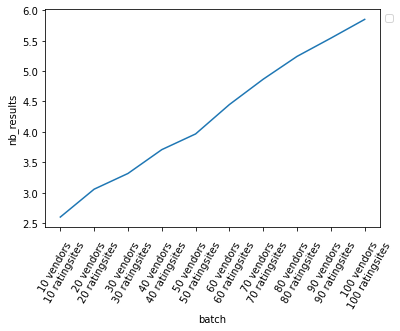

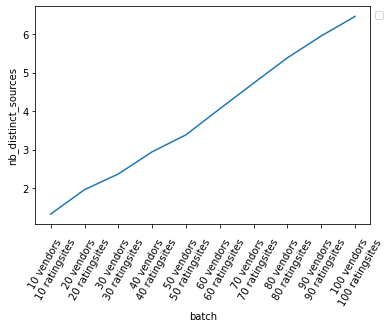

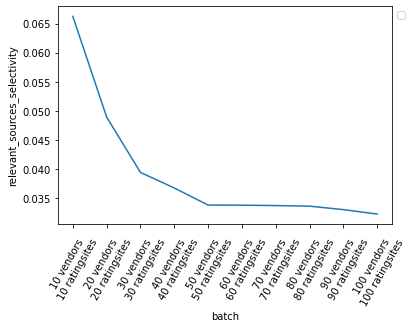

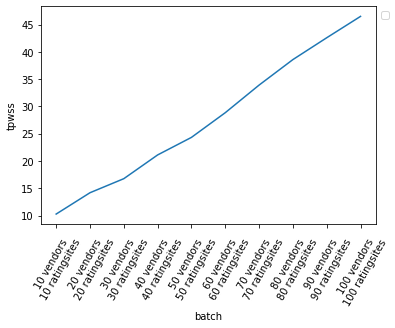

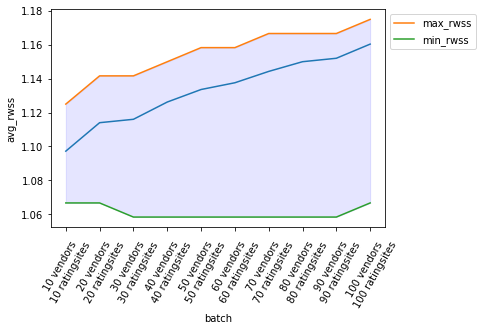

In [ ]:
plot_metrics = generation_metrics.columns[3:]

for metric in plot_metrics:
    if "min" in metric or "max" in metric:
        continue
    g = sns.lineplot(data=generation_metrics, x="batch", y=metric, markers="o", errorbar=None)

    if metric == "avg_rwss":
        max_line = sns.lineplot(data=generation_metrics, x="batch", y="max_rwss", markers="o", errorbar=None, label="max_rwss")
        min_line = sns.lineplot(data=generation_metrics, x="batch", y="min_rwss", markers="o", errorbar=None, label="min_rwss")

        line = min_line.get_lines()

        plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=0.1)


    g.set_xticks(generation_metrics["batch"].unique())
    g.set_xticklabels(xticks, rotation=60)
    g.set_yscale("linear")
    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    plt.show()

In [ ]:
generation_metrics["total_sources"] = generation_metrics["batch"].apply(lambda x: vendors_labels[x] + ratingsite_labels[x])
generation_metrics = generation_metrics.apply(linear_regression, axis=1)
generation_metrics

query instance  batch  nb_results  nb_distinct_sources  \
10     q01        0      0           1                    1   
130    q01        0      1           1                    1   
250    q01        0      2           1                    1   
370    q01        0      3           3                    3   
490    q01        0      4           4                    4   
...    ...      ...    ...         ...                  ...   
609    q12        9      5           1                    1   
729    q12        9      6           1                    1   
849    q12        9      7           1                    1   
969    q12        9      8           1                    1   
1089   q12        9      9           1                    1   

      relevant_sources_selectivity  tpwss  avg_rwss  min_rwss  max_rwss  \
10                        0.050000      8       1.0       1.0       1.0   
130                       0.025000      8       1.0       1.0       1.0   
250                       0.016667      8       1.0       1.0       1.0   
370                       0.037500     24       1.0       1.0       1.0   
490                       0.040000     32       1.0       1.0       1.0   
...                            ...    ...       ...       ...       ...   
609                       0.008333     10       1.0       1.0       1.0   
729                       0.007143     10       1.0       1.0       1.0   
849                       0.006250     10       1.0       1.0       1.0   
969                       0.005556     10       1.0       1.0       1.0   
1089                      0.005000     10       1.0       1.0       1.0   

      total_sources  rss_slope  distinct_slope  slope_gap  
10               20  -0.002437        0.466667  19.533333  
130              40  -0.002437        0.466667  19.533333  
250              60  -0.002437        0.466667  19.533333  
370              80  -0.002437        0.466667  19.533333  
490             100  -0.002437        0.466667  19.533333  
...             ...        ...             ...        ...  
609             120  -0.003703        0.000000  20.000000  
729             140  -0.003703        0.000000  20.000000  
849             160  -0.003703        0.000000  20.000000  
969             180  -0.003703        0.000000  20.000000  
1089            200  -0.003703        0.000000  20.000000  

[1200 rows x 14 columns]

In [ ]:
def area_under_curve(data):
    return np.trapz(y=data["y_total"]) - np.trapz(y=data["y_distinct"])

growth = generation_metrics['distinct_slope']
mean_rss_slope = generation_metrics['rss_slope']

- Let $y=a \times x + b$ be the equation of the regression line between `distinct_source` and `batch`.
- The source selectivity is given by: $$\texttt{relevant_source_selection} = \frac{\texttt{distinct_source}}{\texttt{total_source}}$$
- The slope $a$ indicates the growth speed of `distinct_source` w.r.t `total_source`. The more $a$ increases, the faster `distinct_source` grows, then the more `relevant_source_selection` decreases.

In [ ]:
# H0: r = 0 (no corr), H1 r < 0 (neg corr)
stats.spearmanr(
    generation_metrics["distinct_slope"], # faster distinct_sources grows...
    generation_metrics['rss_slope'], # ...lower source selectivity
    alternative="greater"
)

SignificanceResult(statistic=0.9219858156028368, pvalue=0.0)

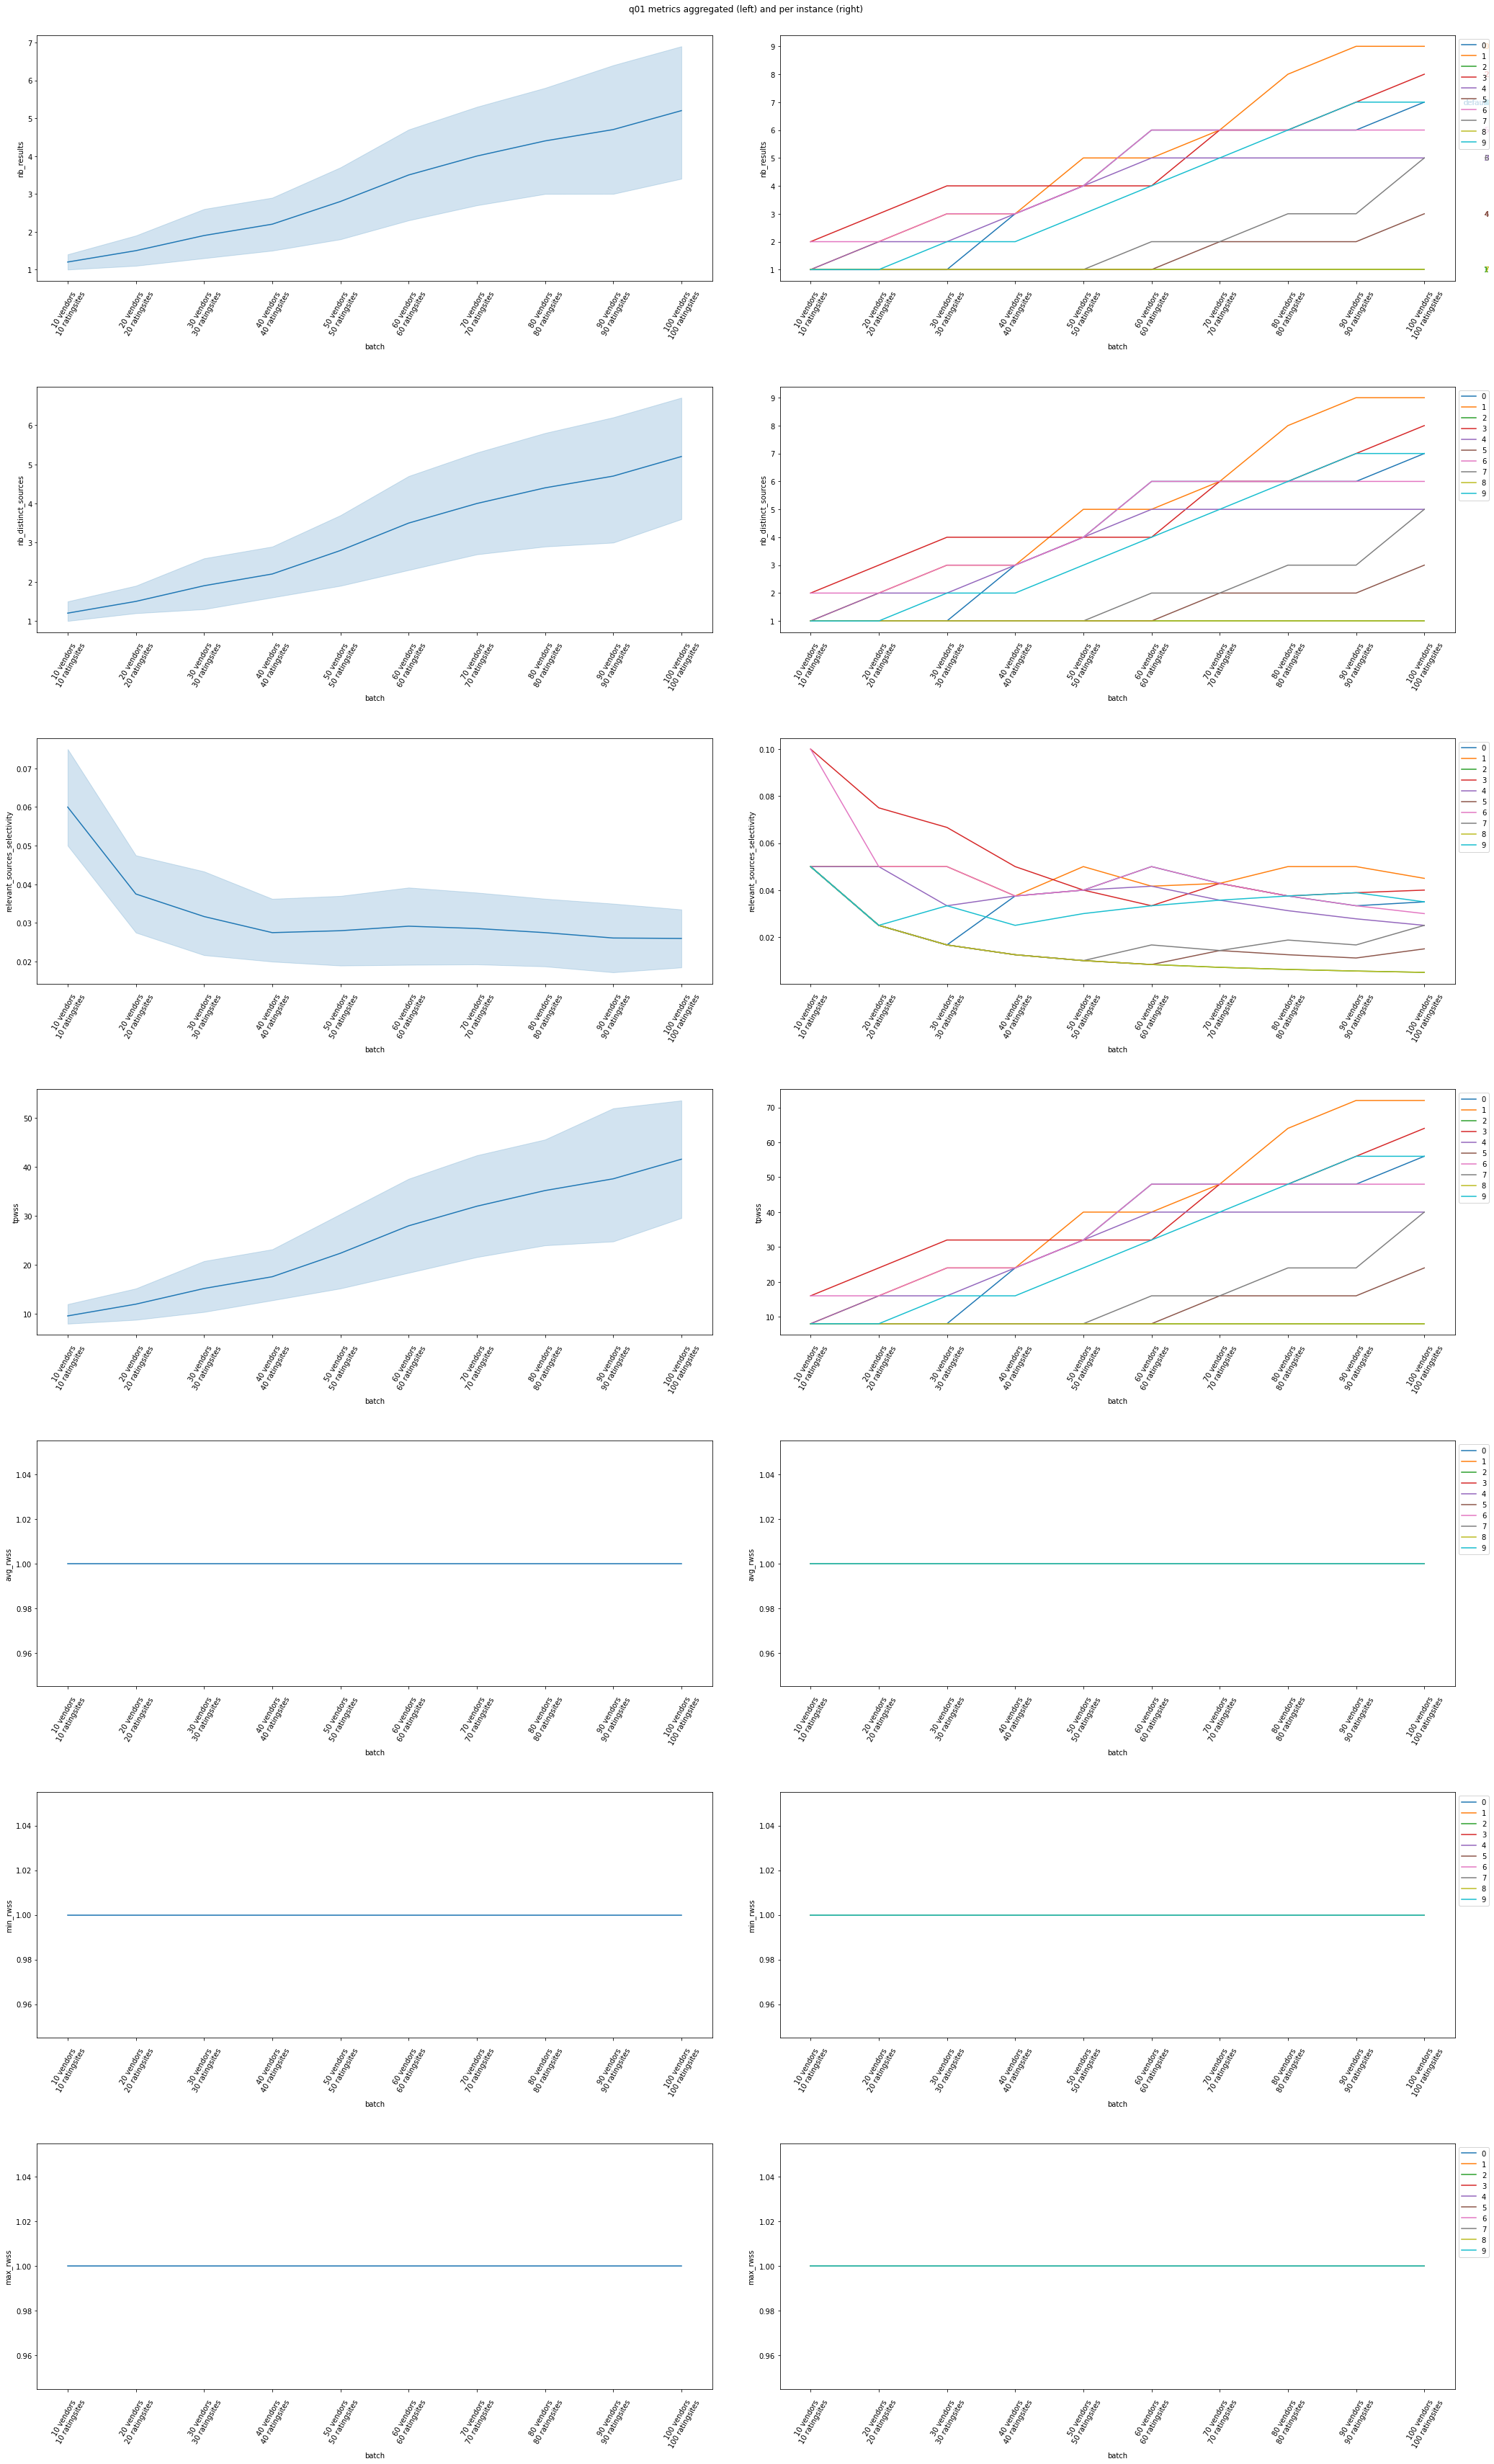

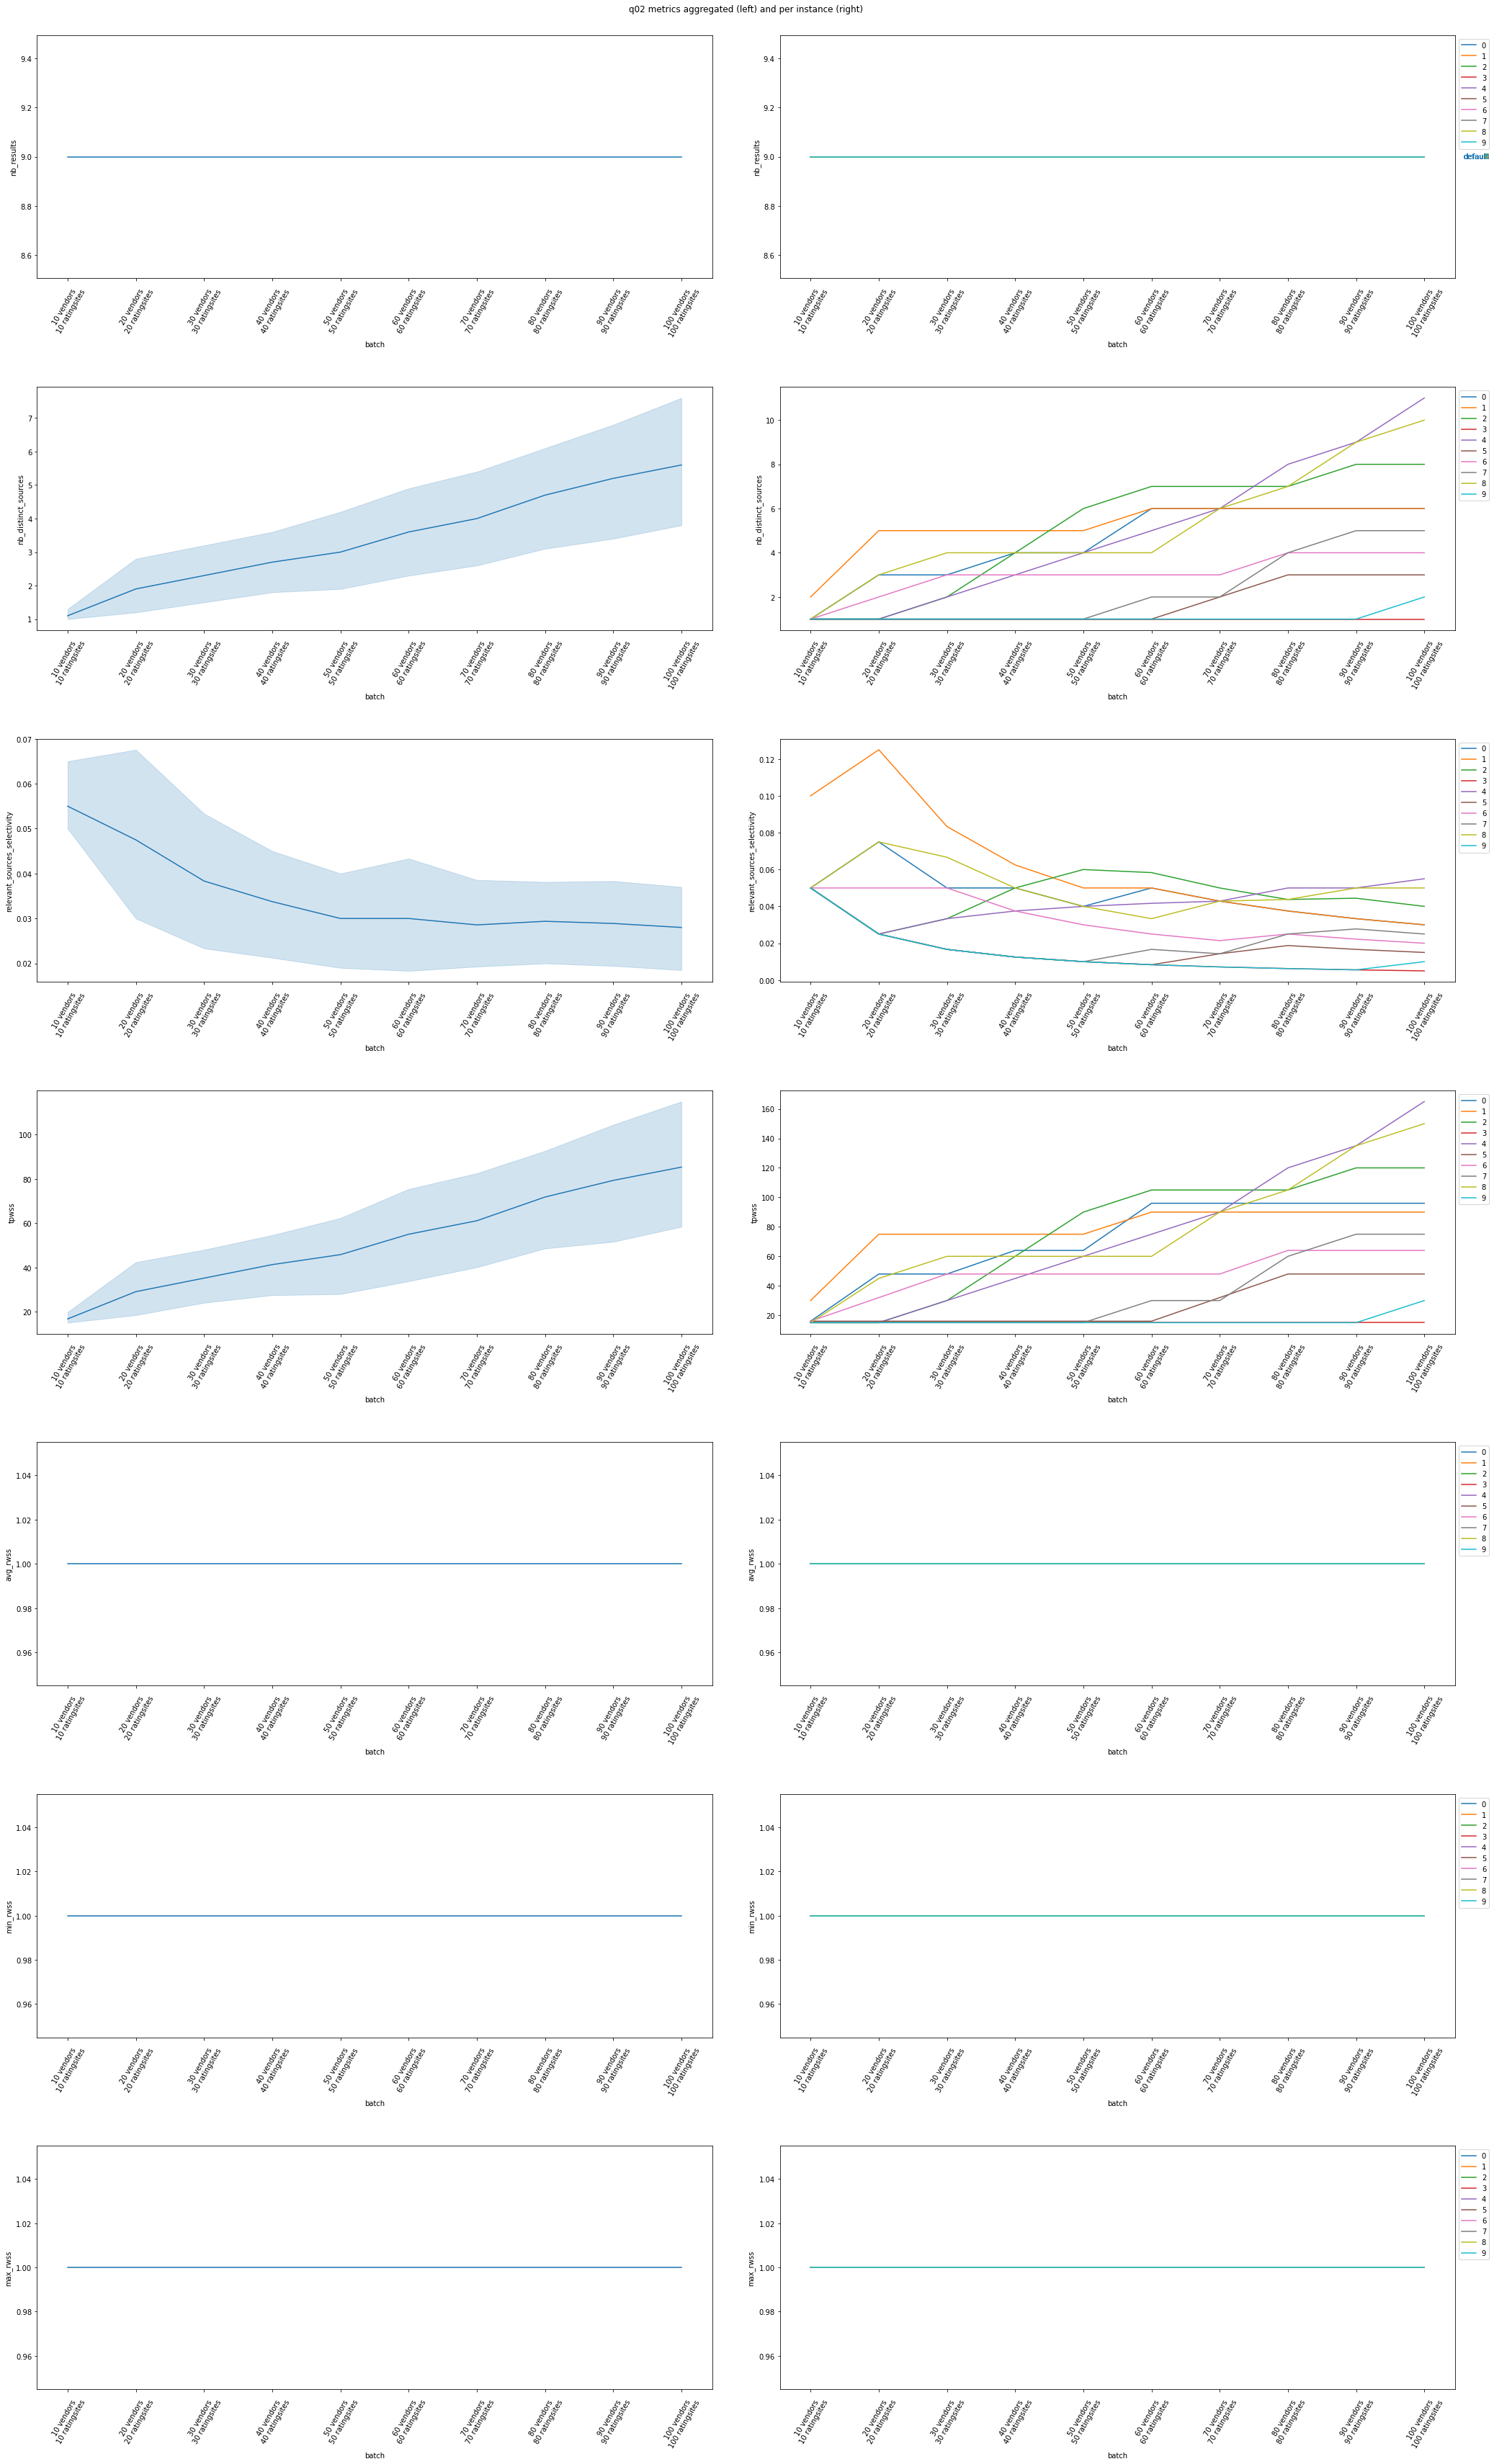

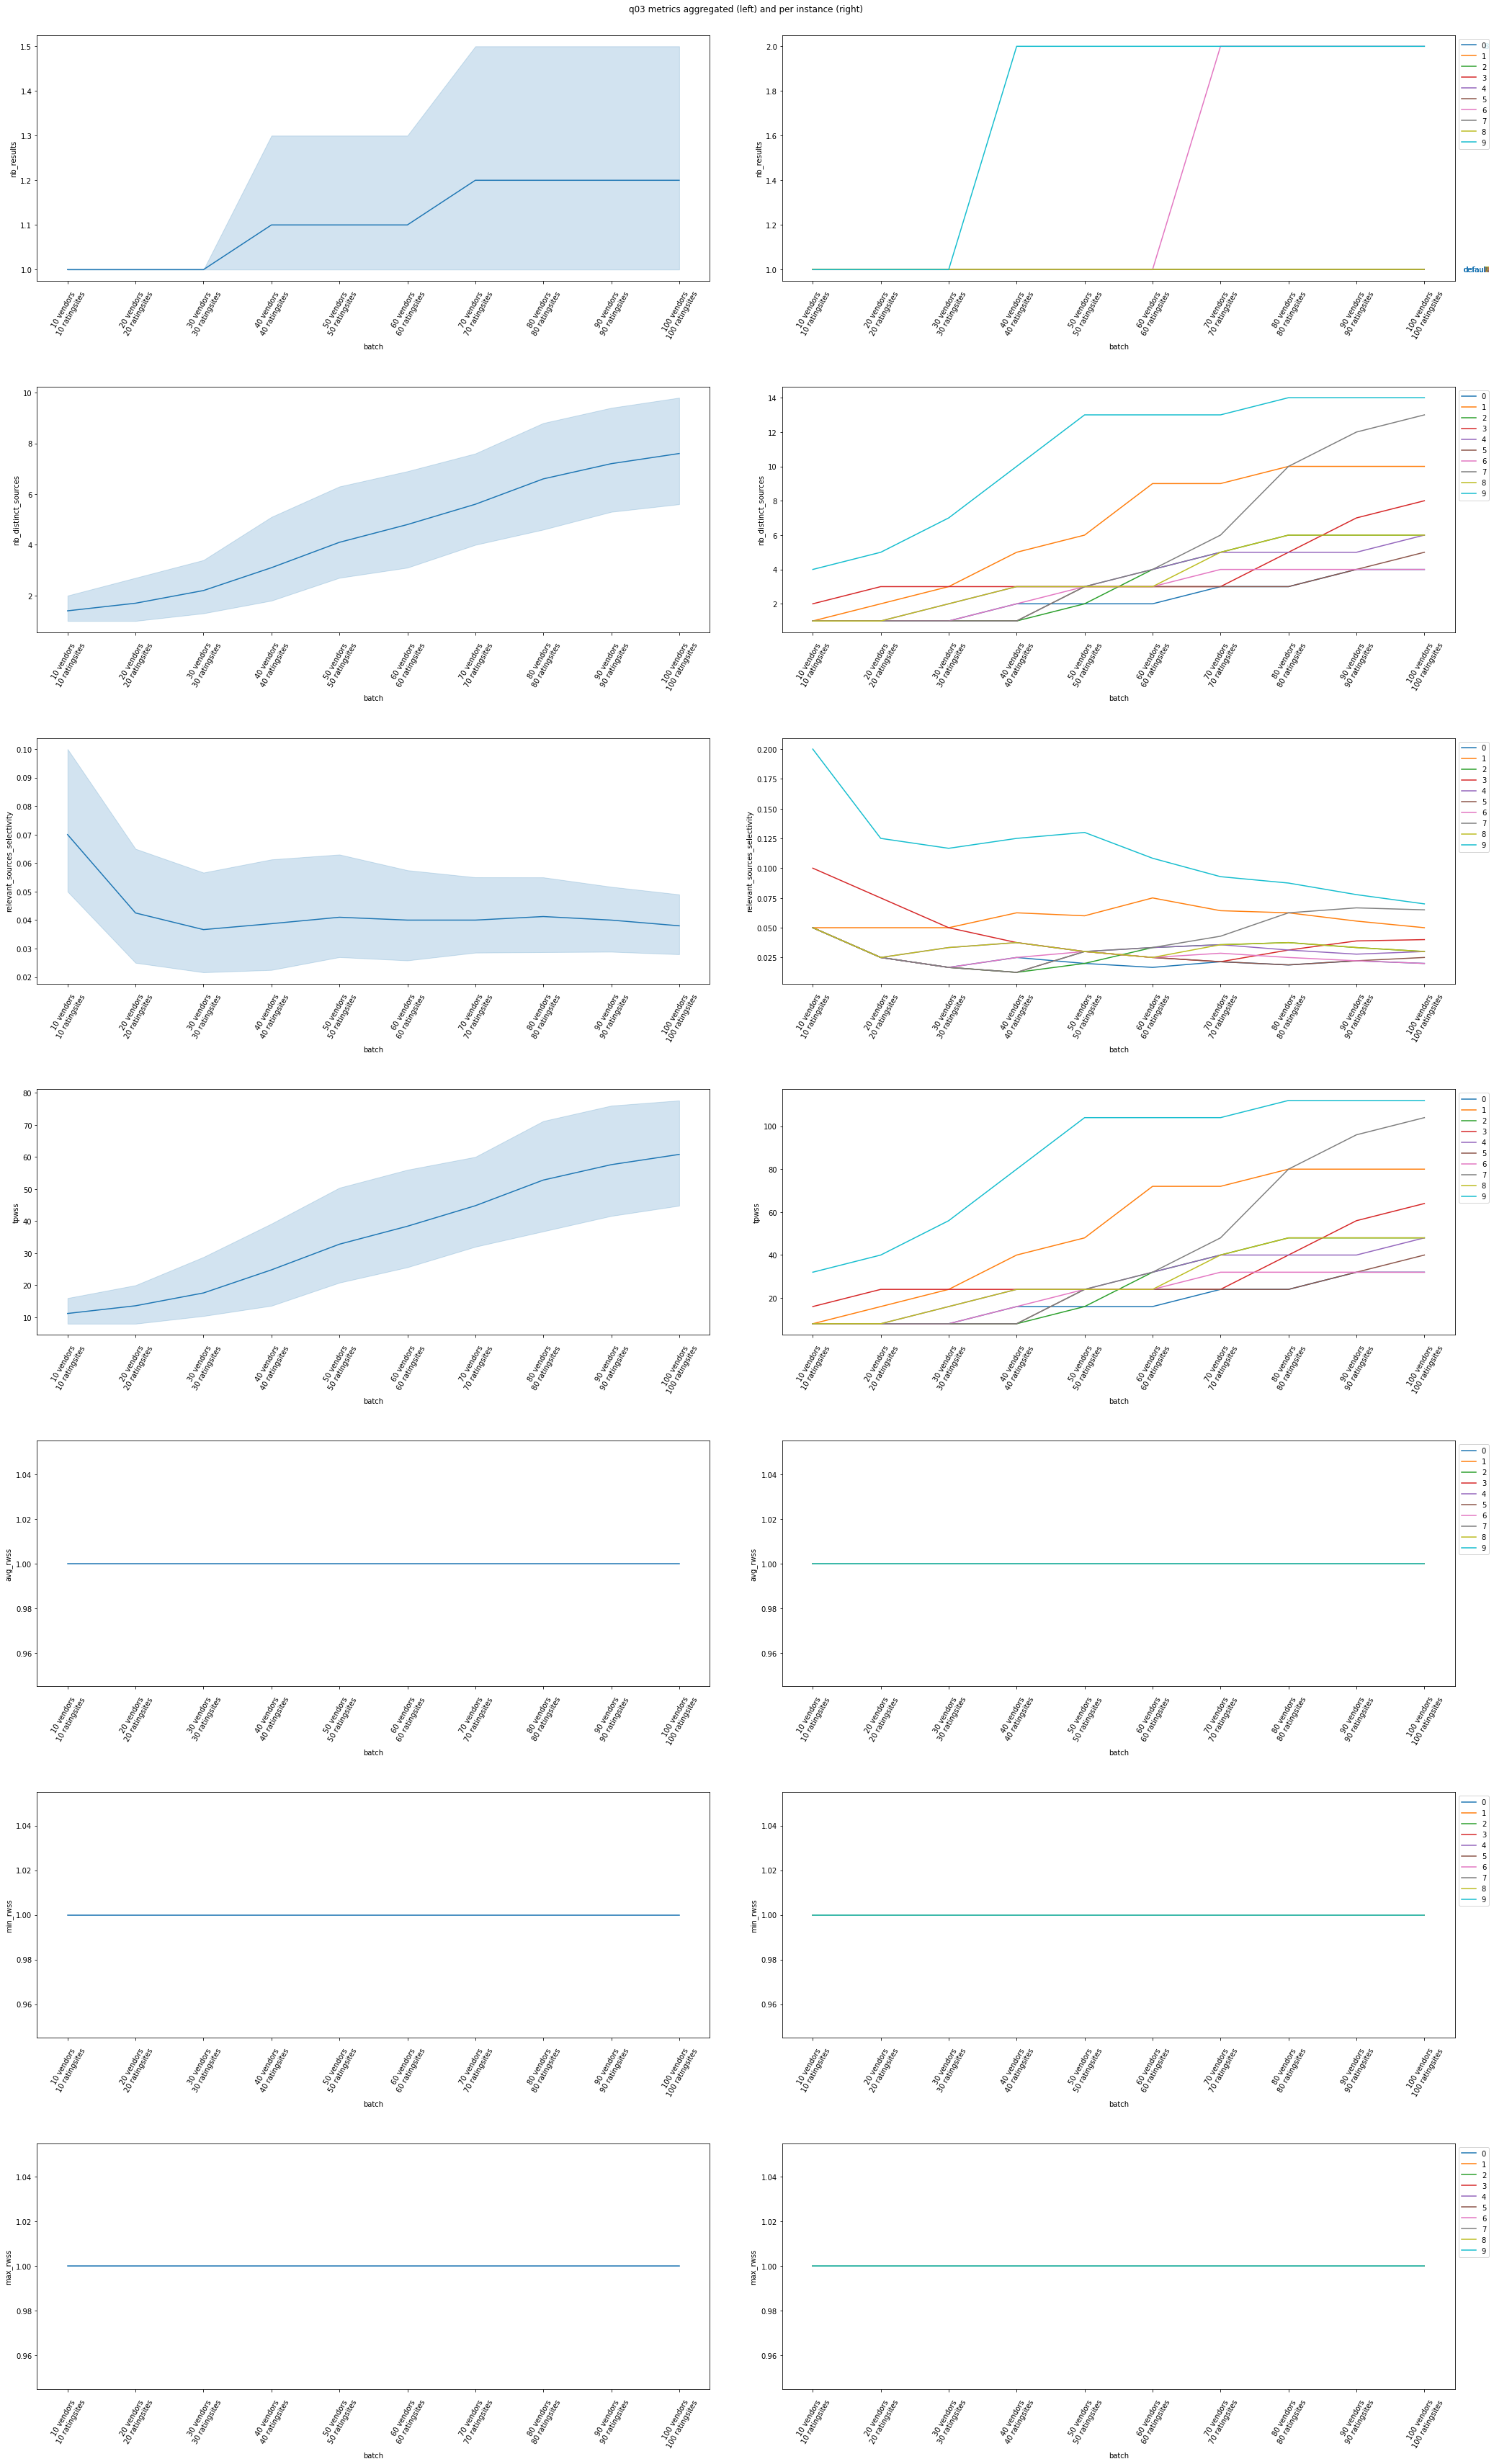

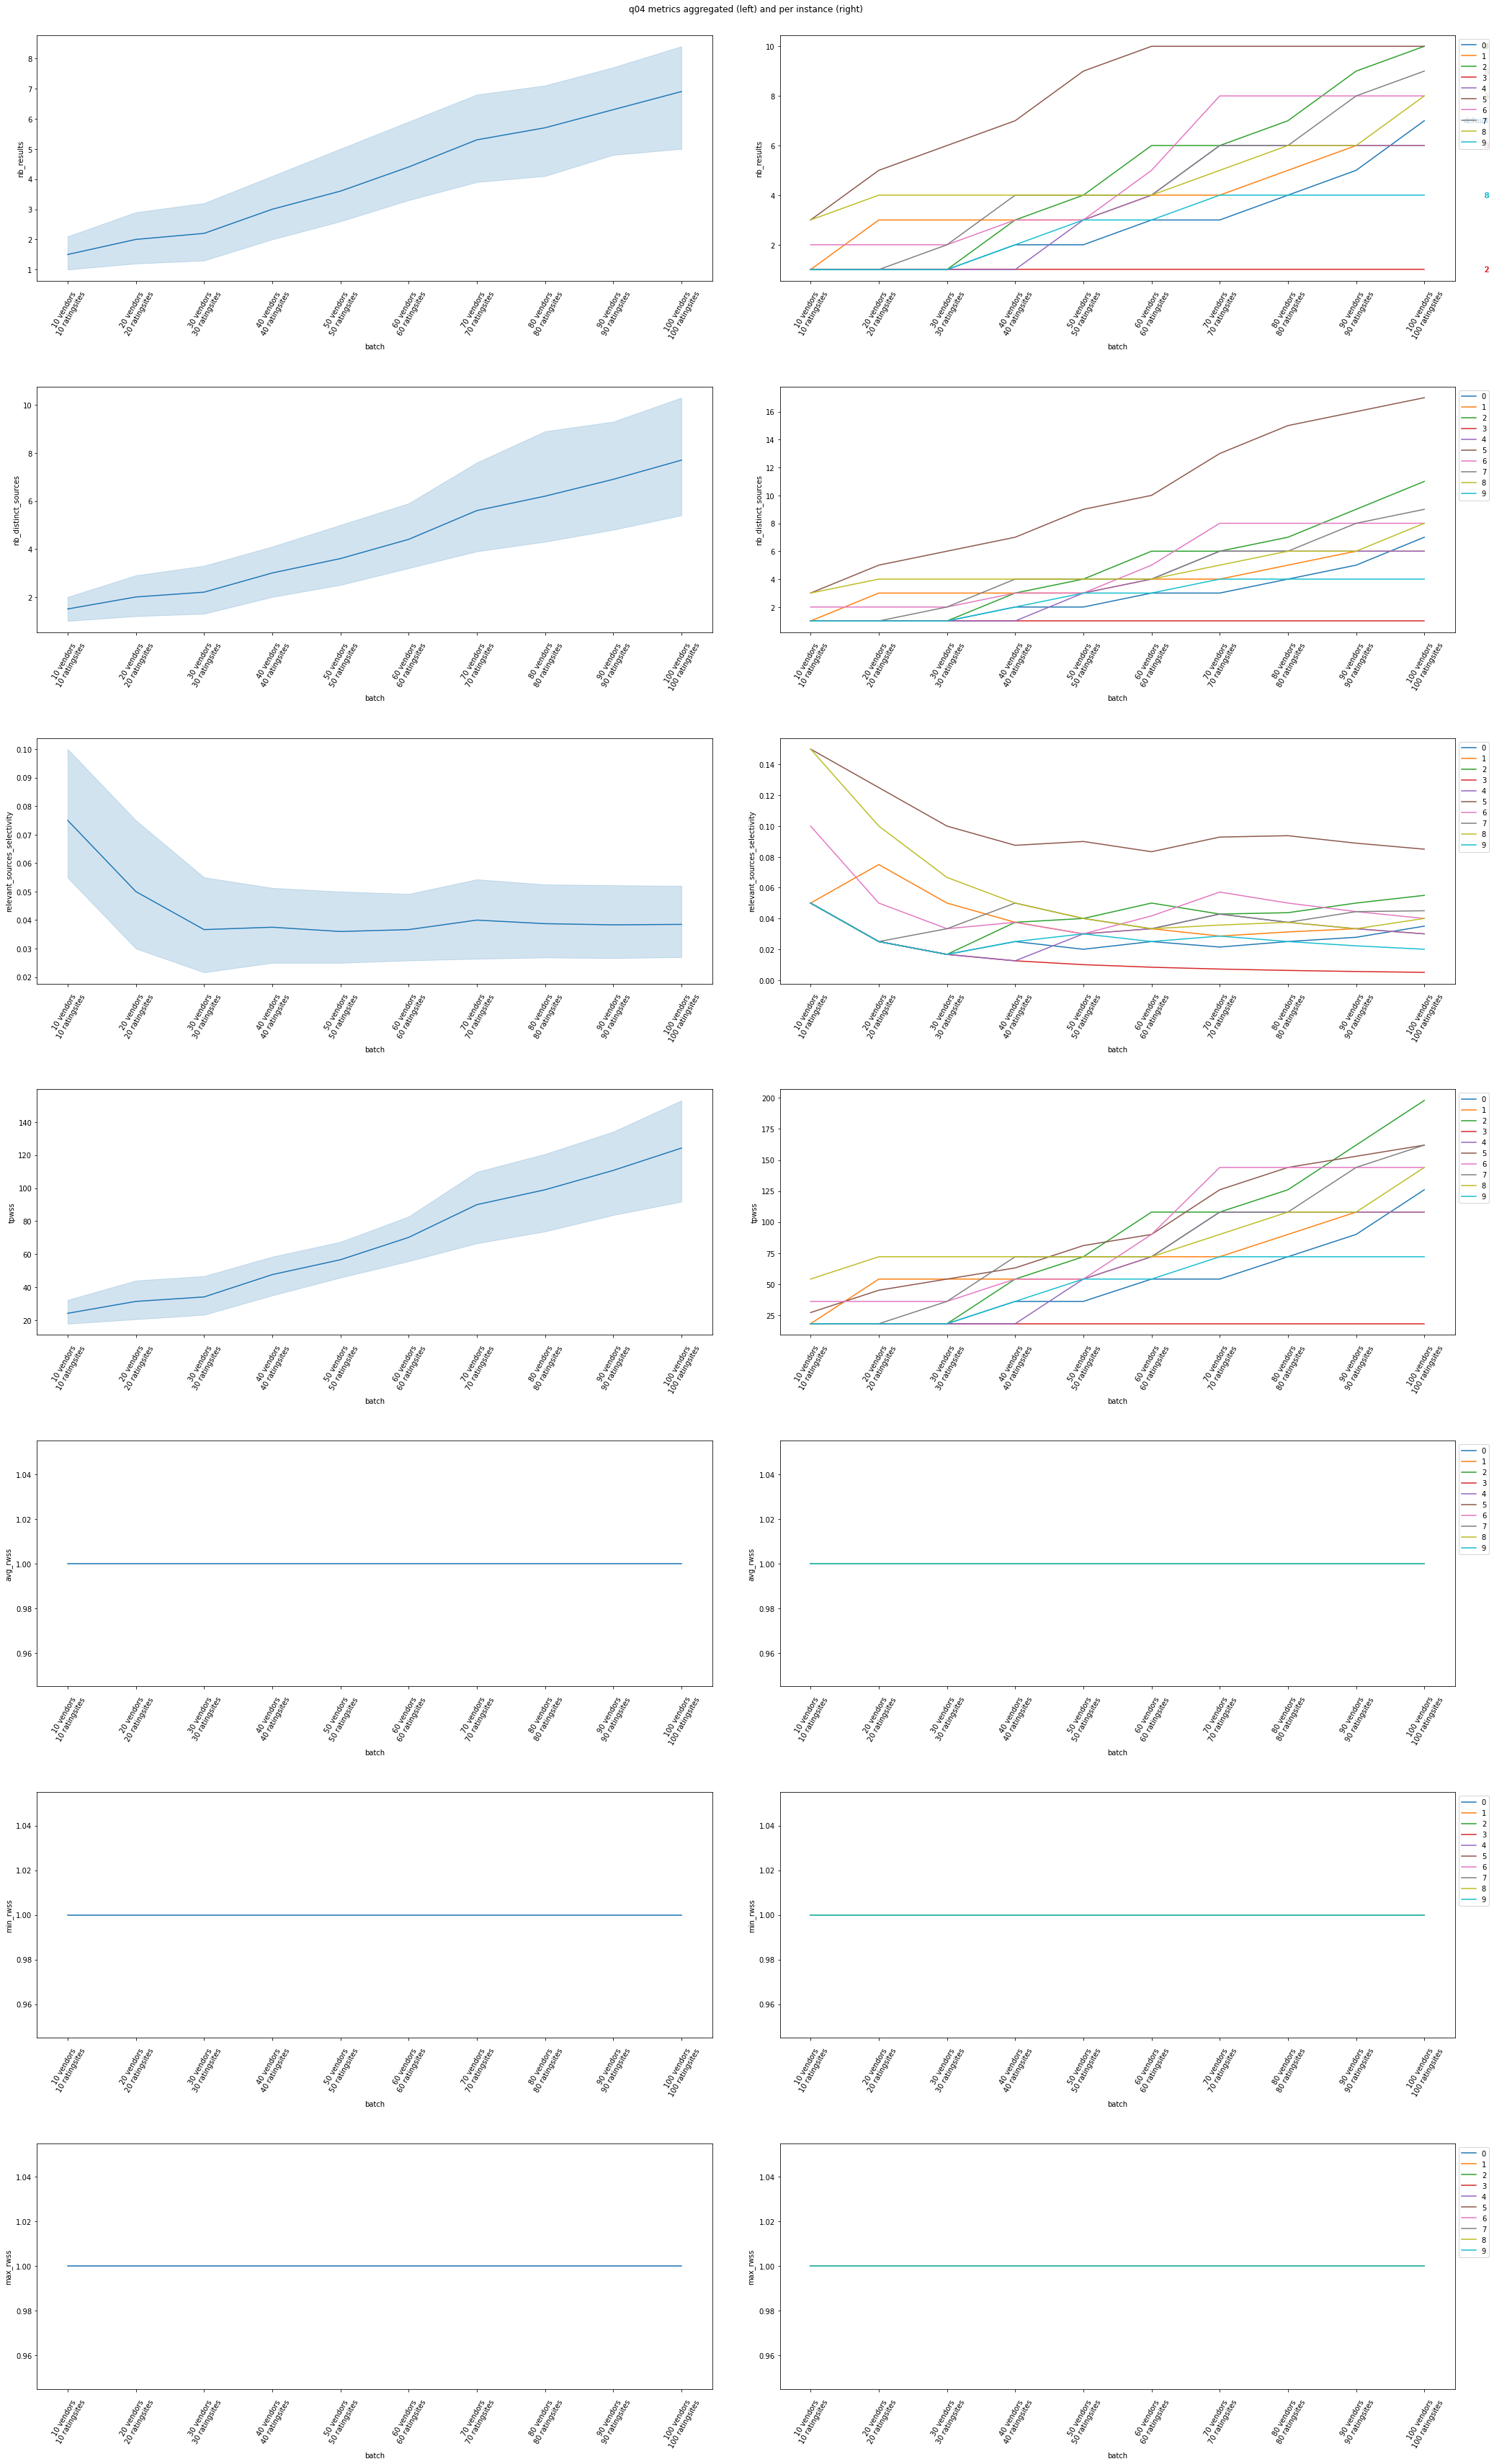

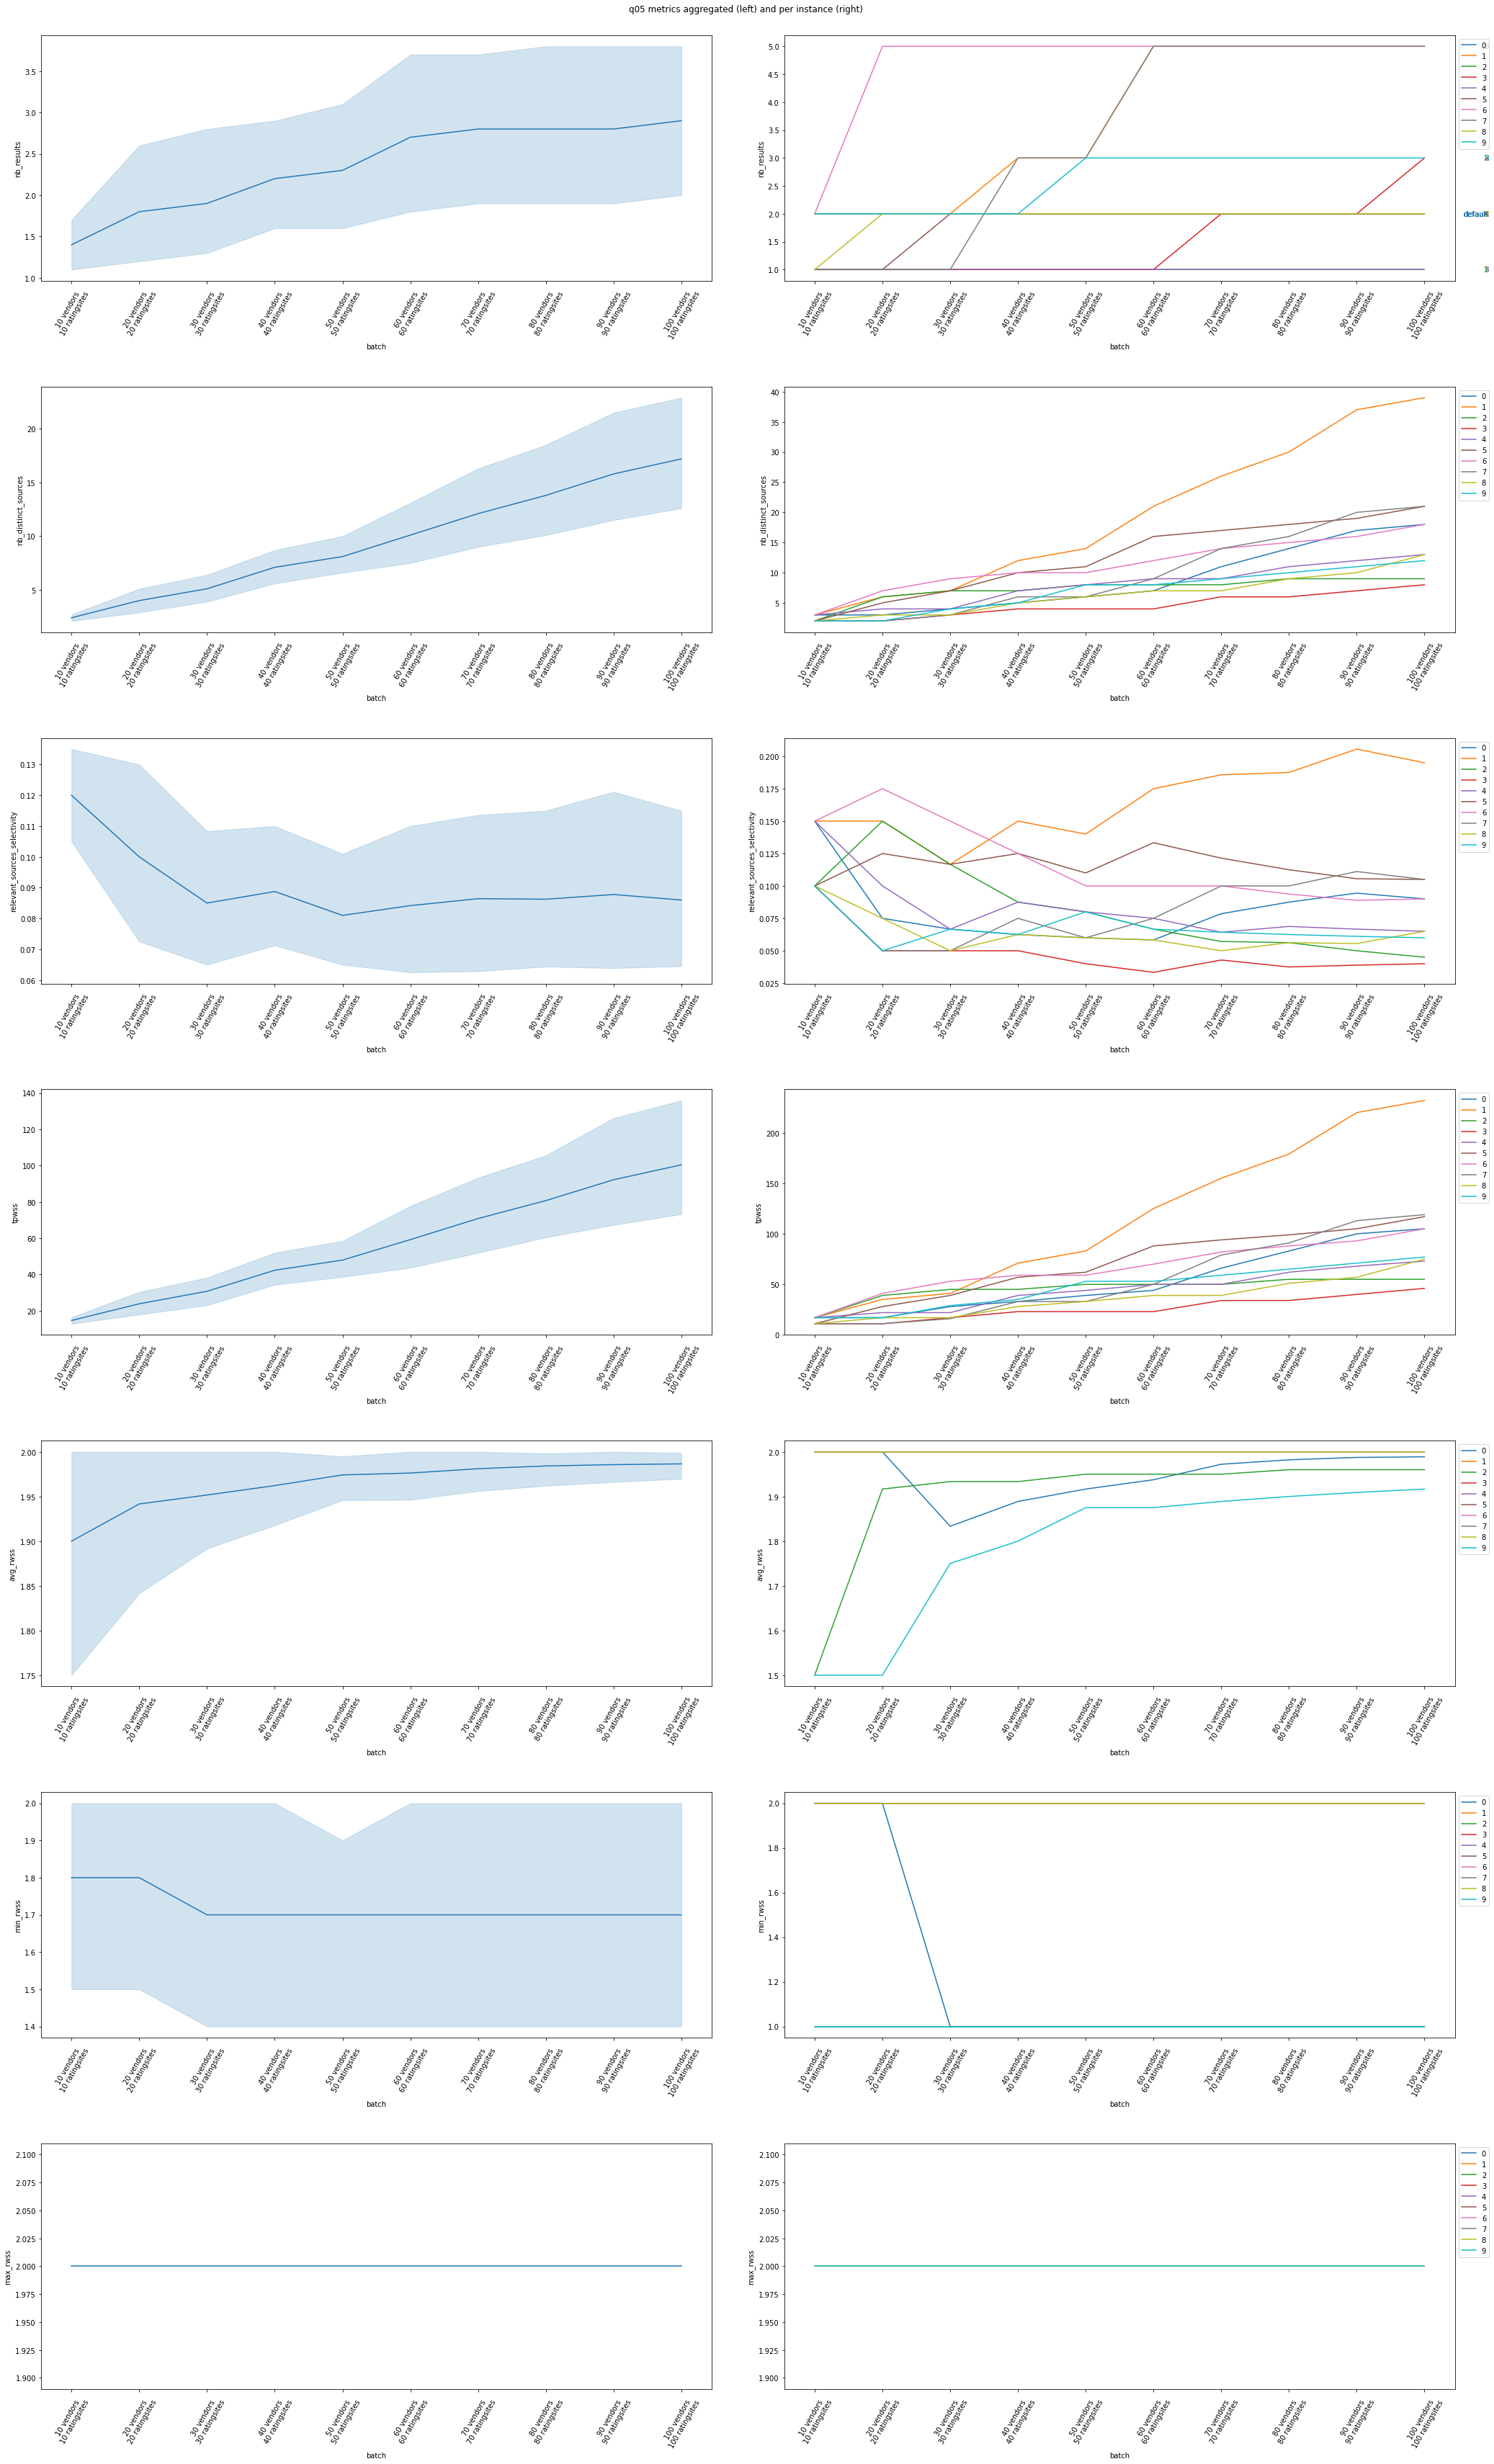

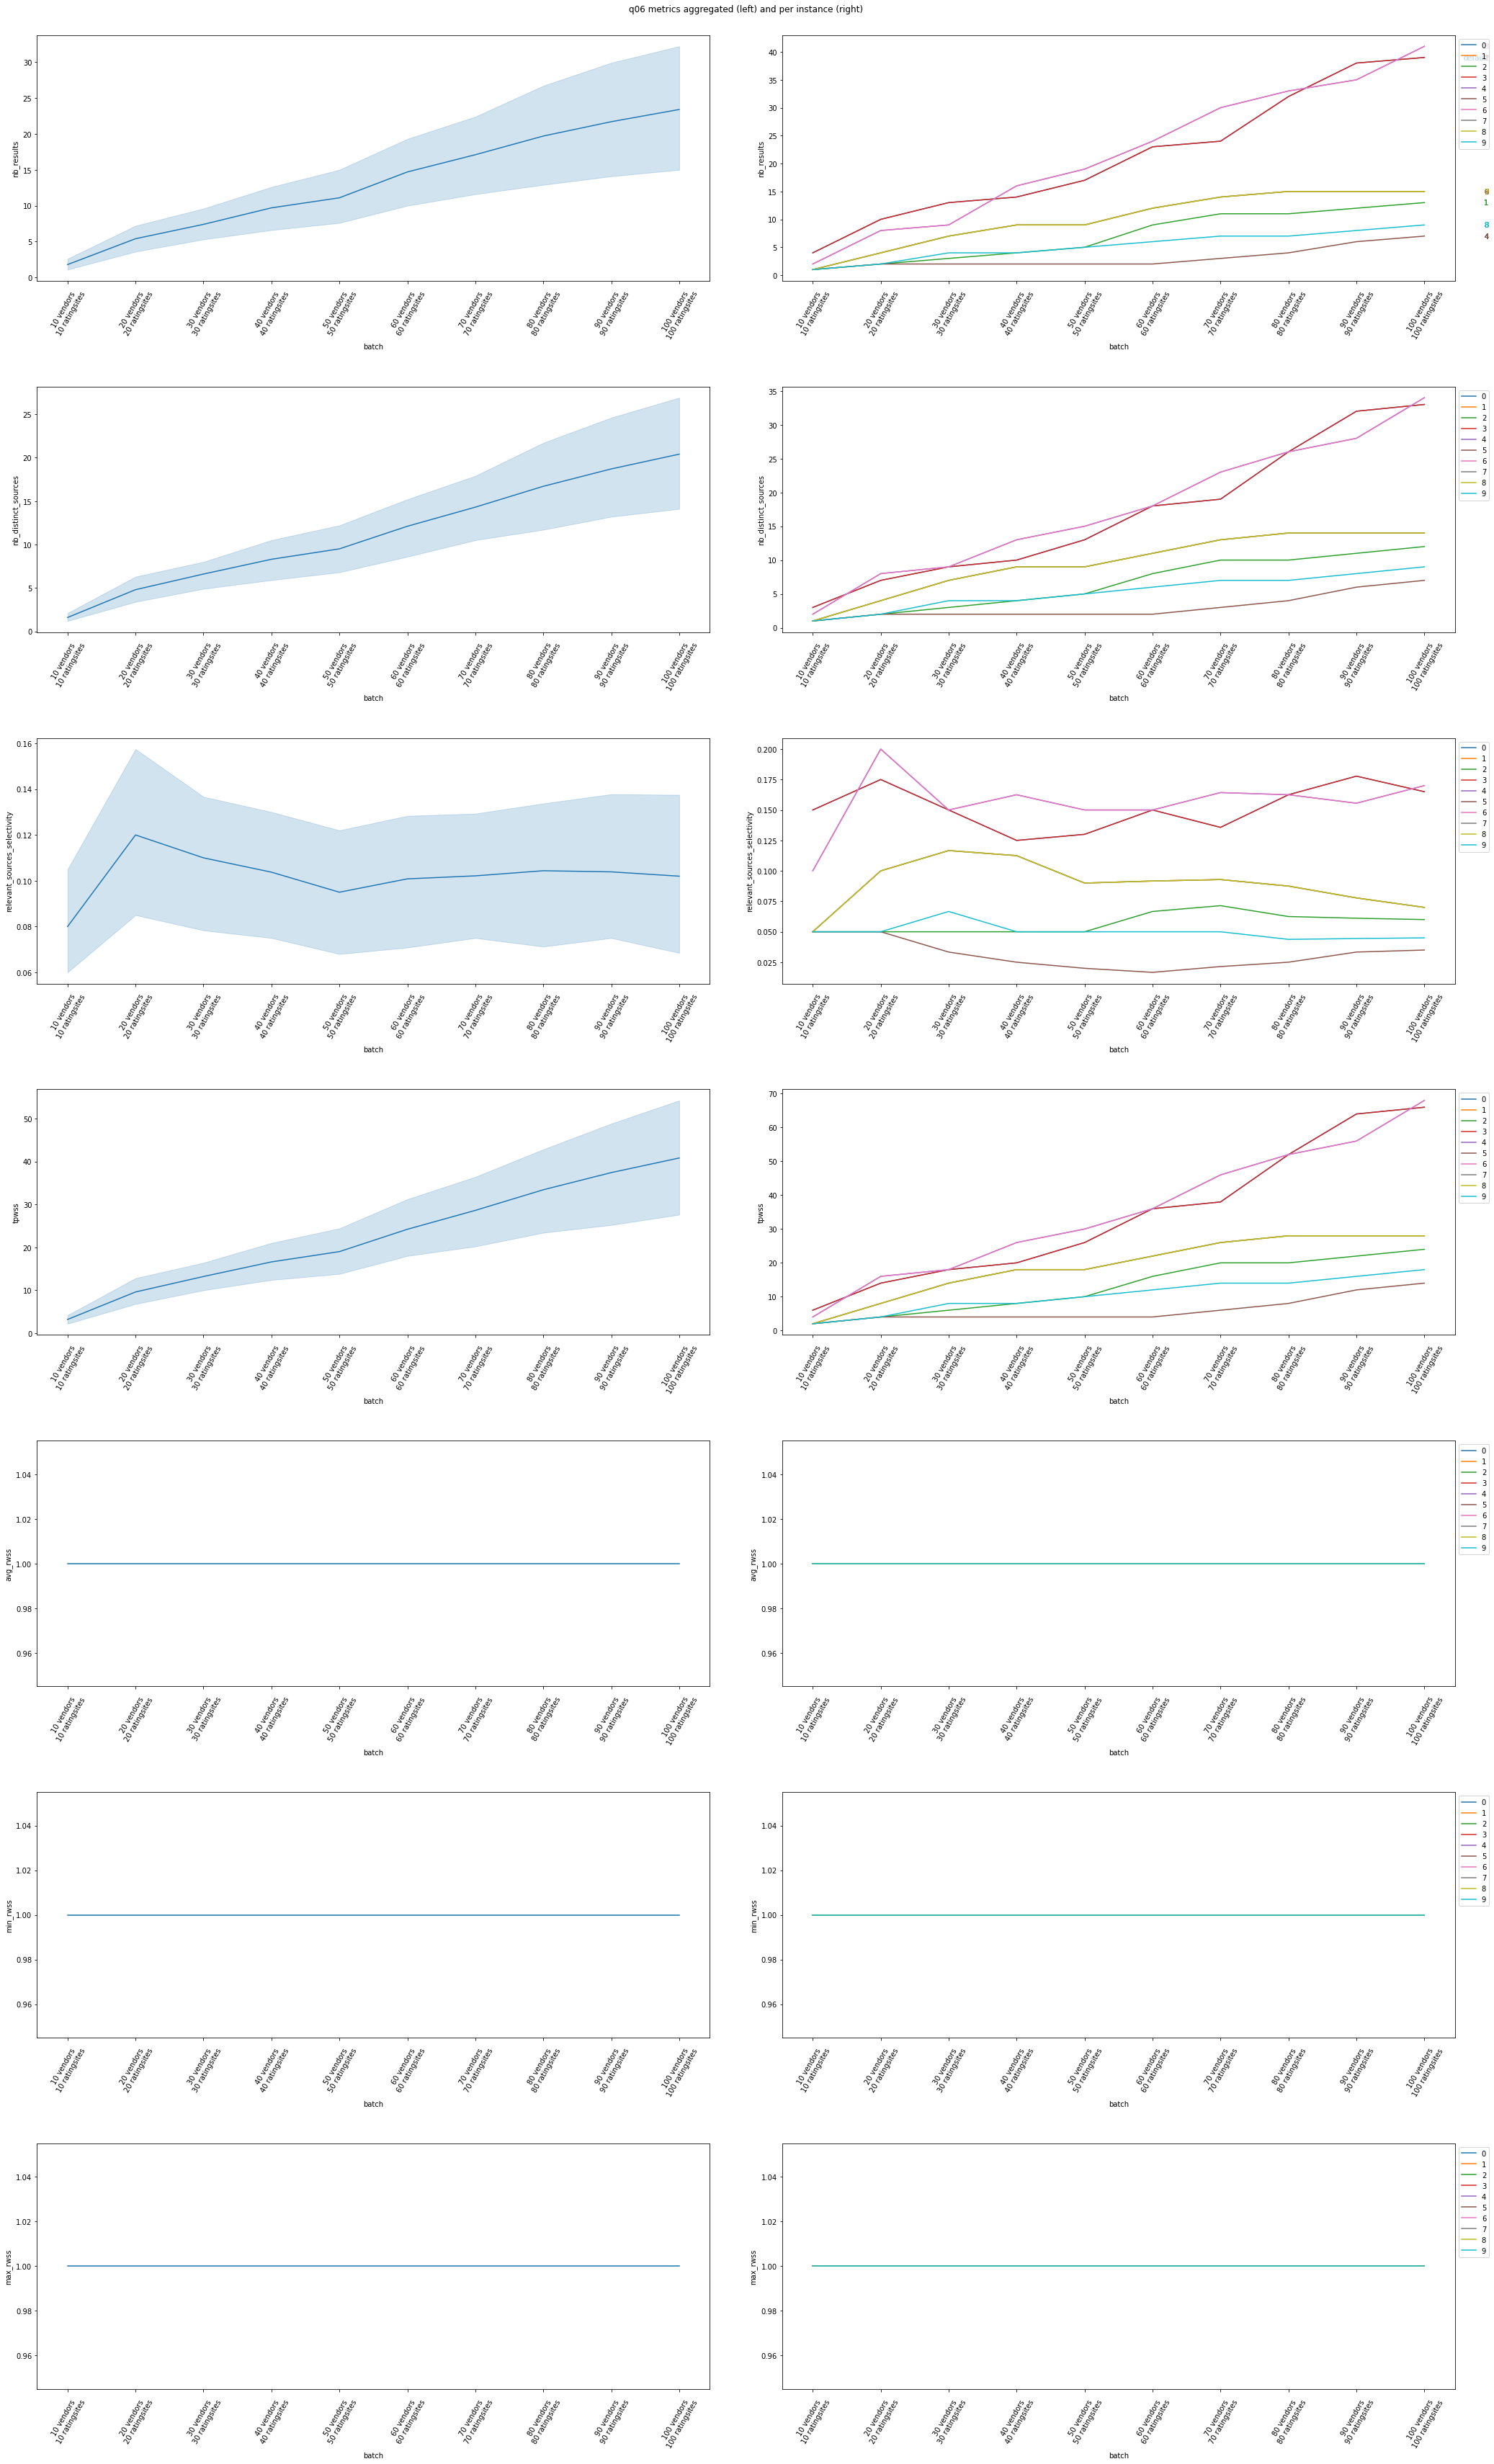

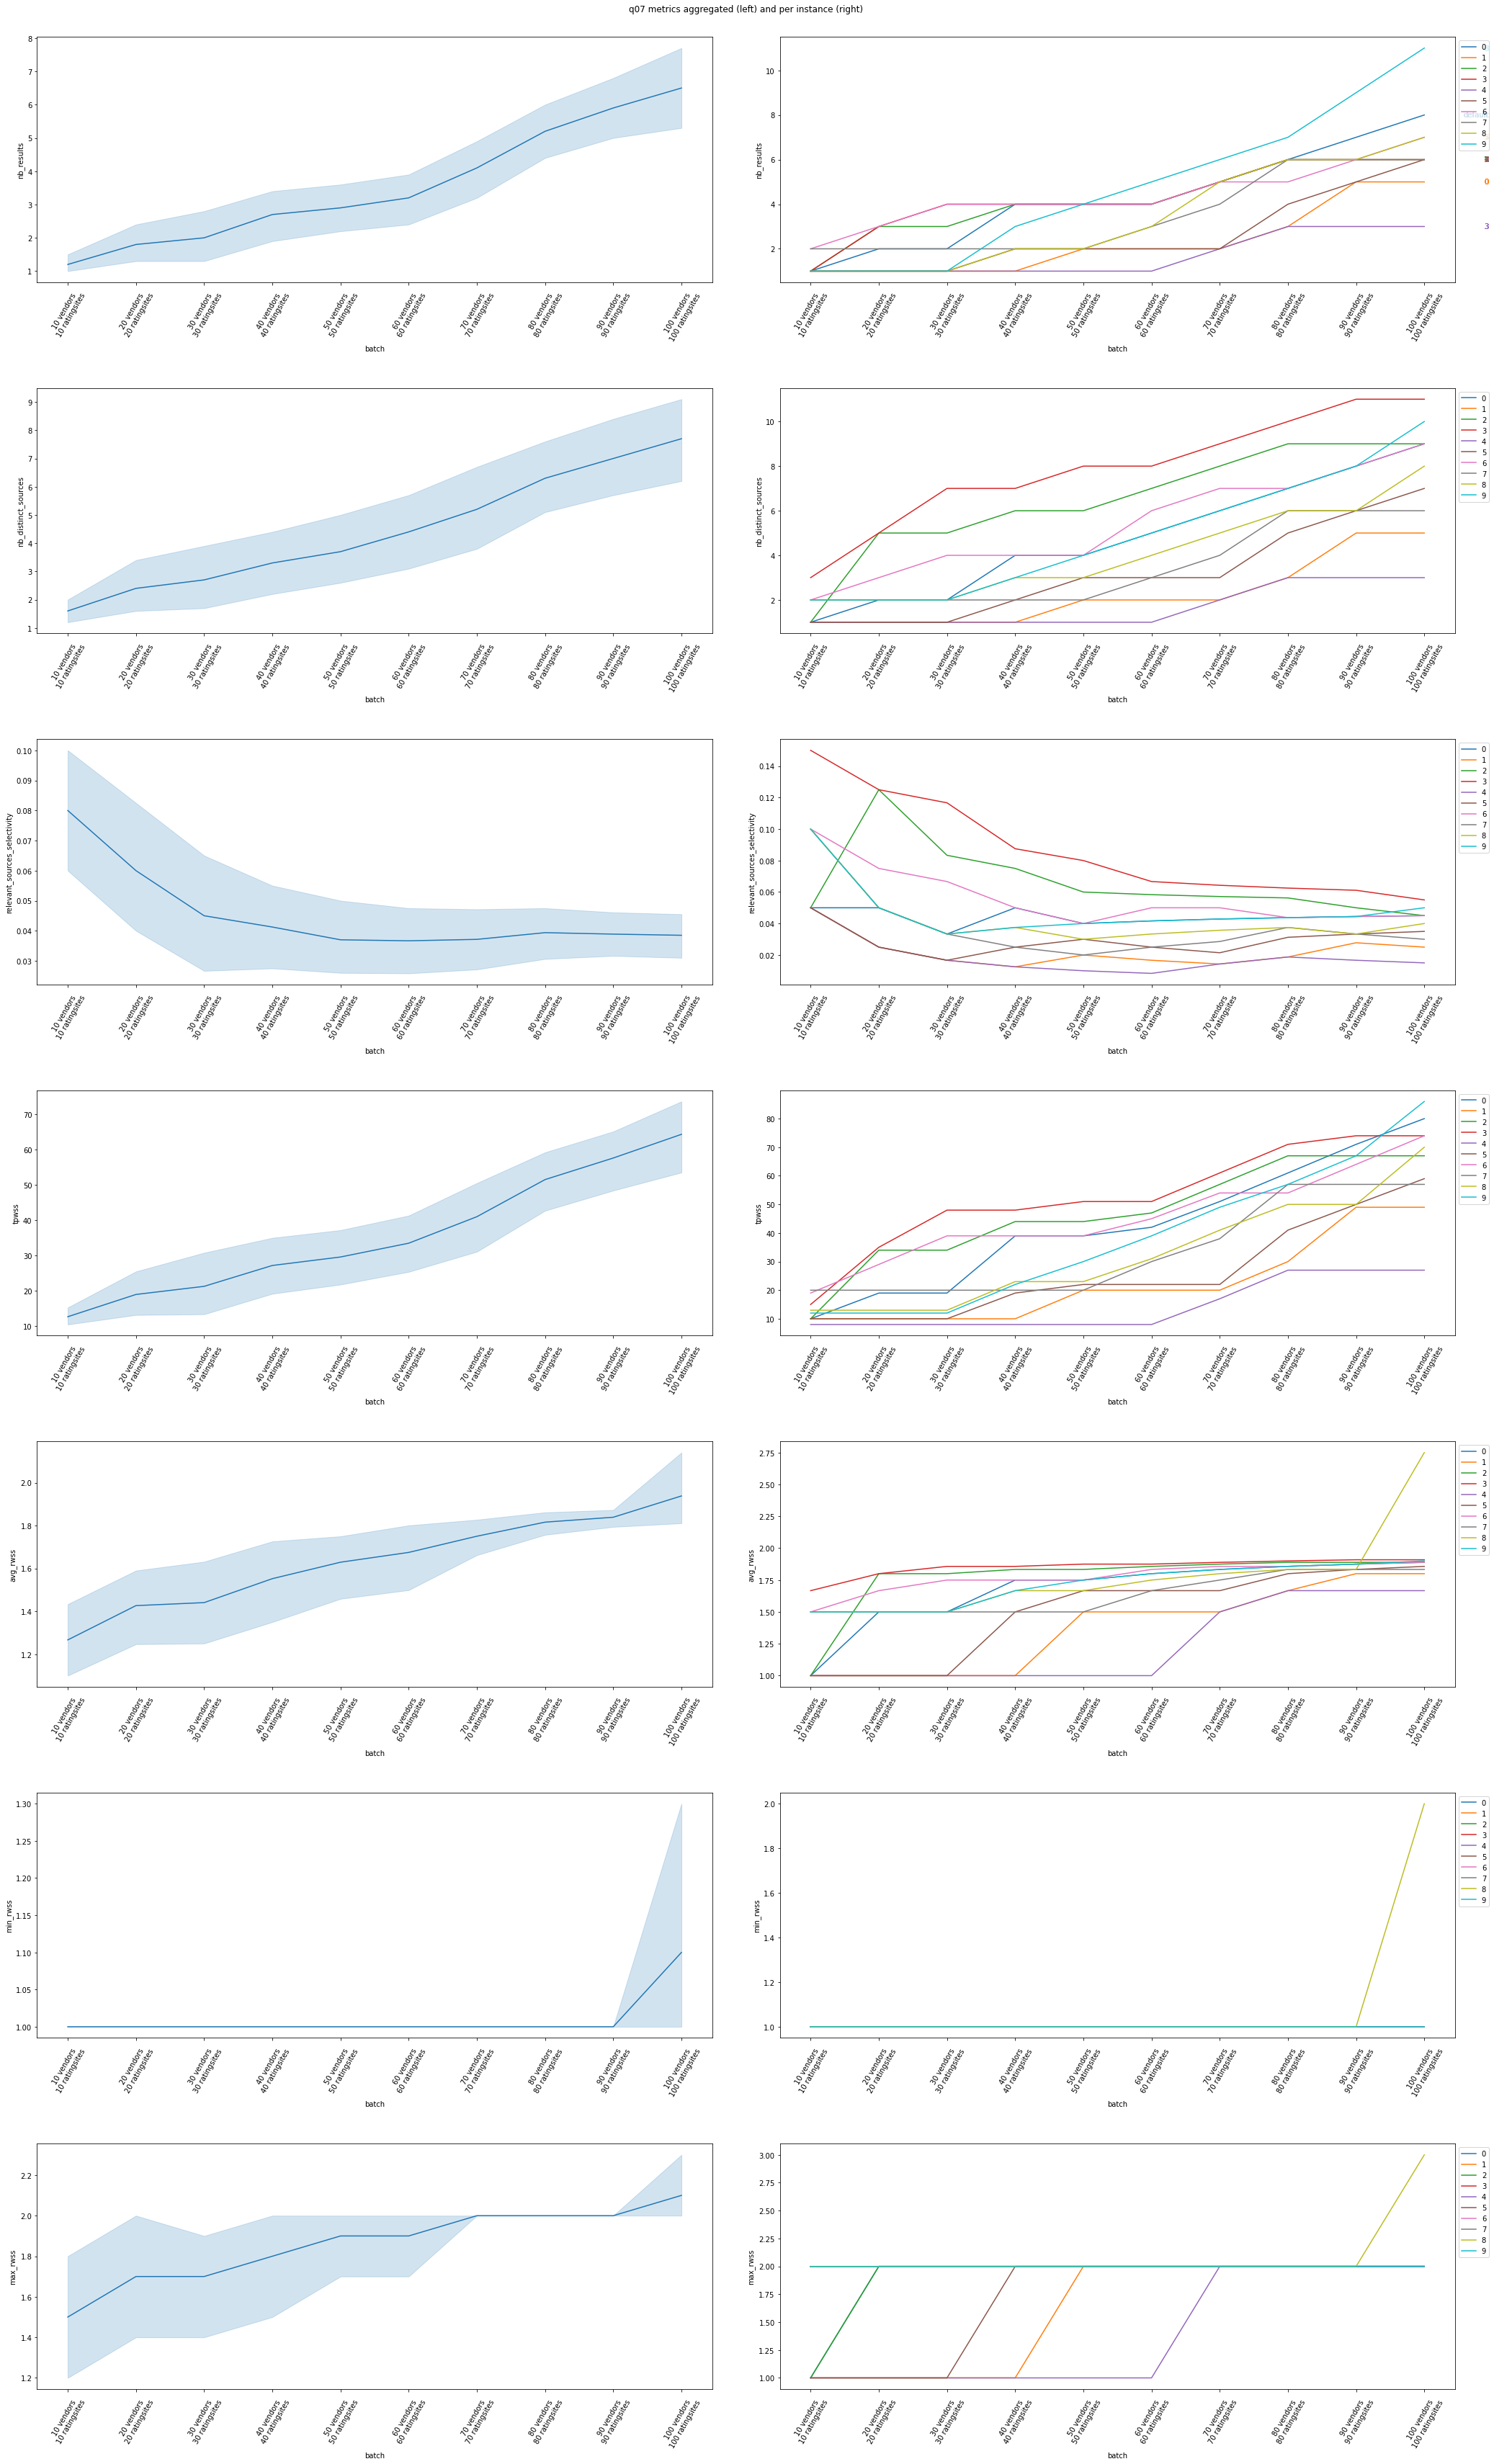

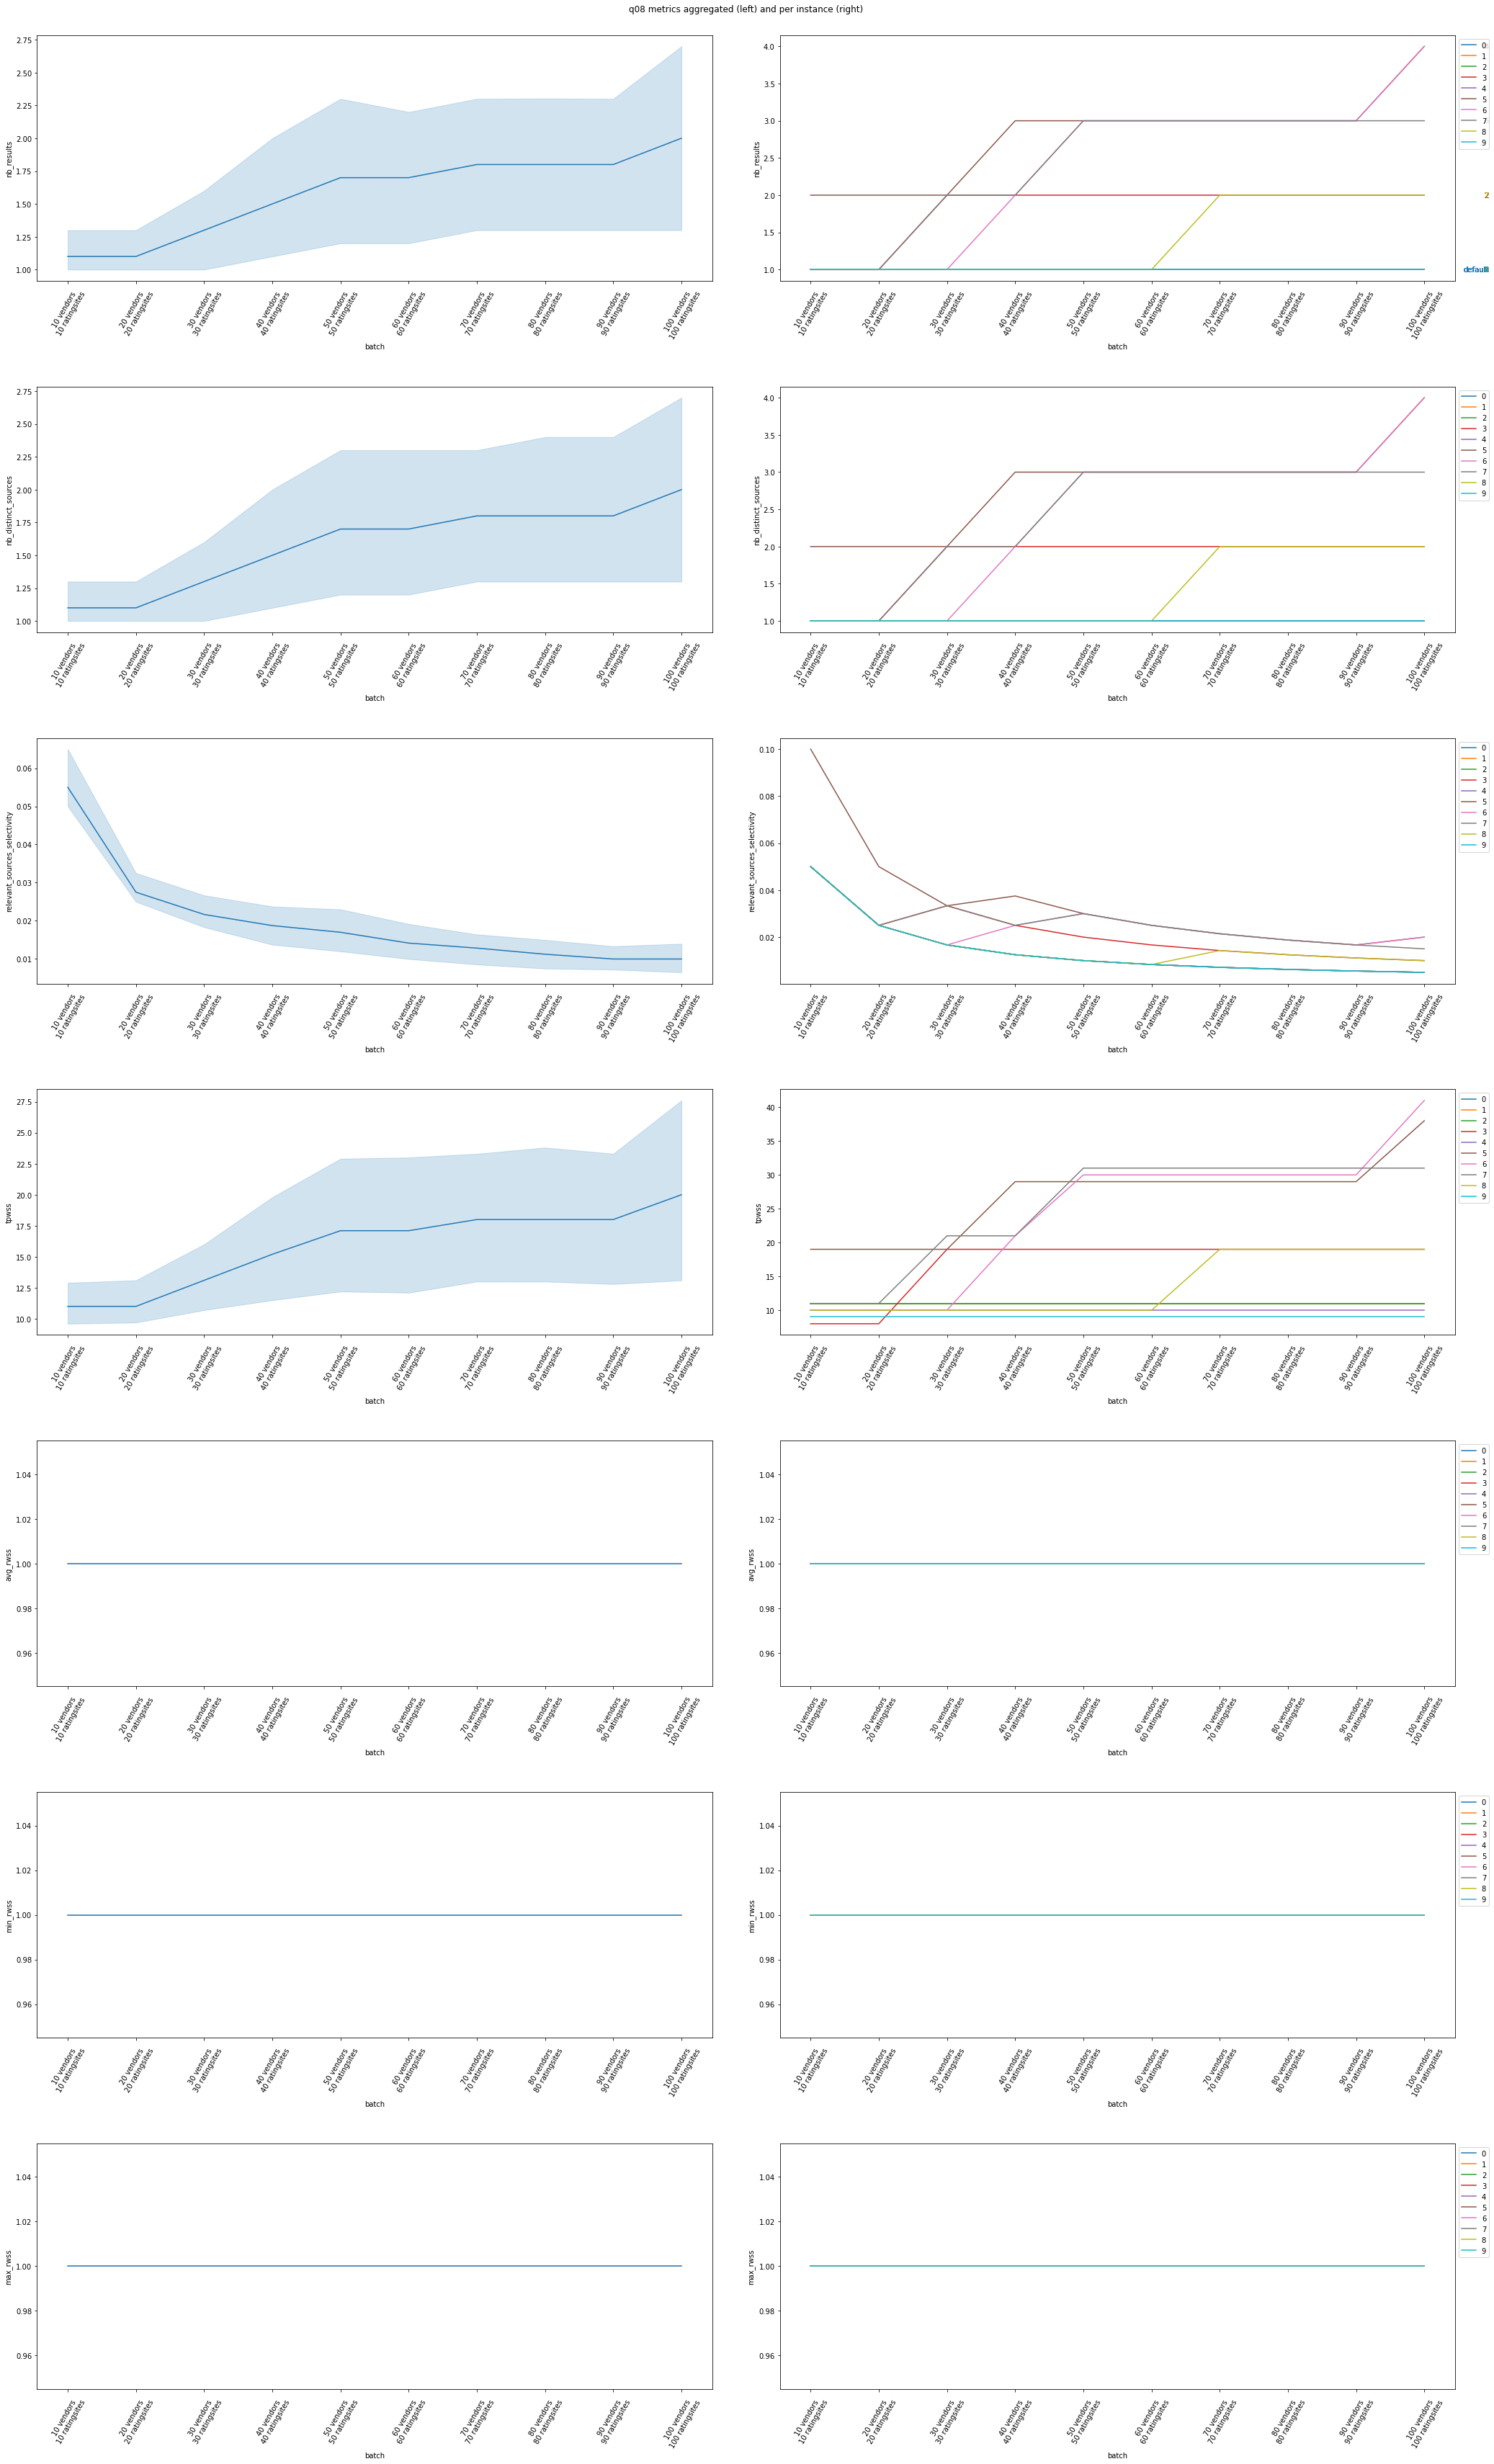

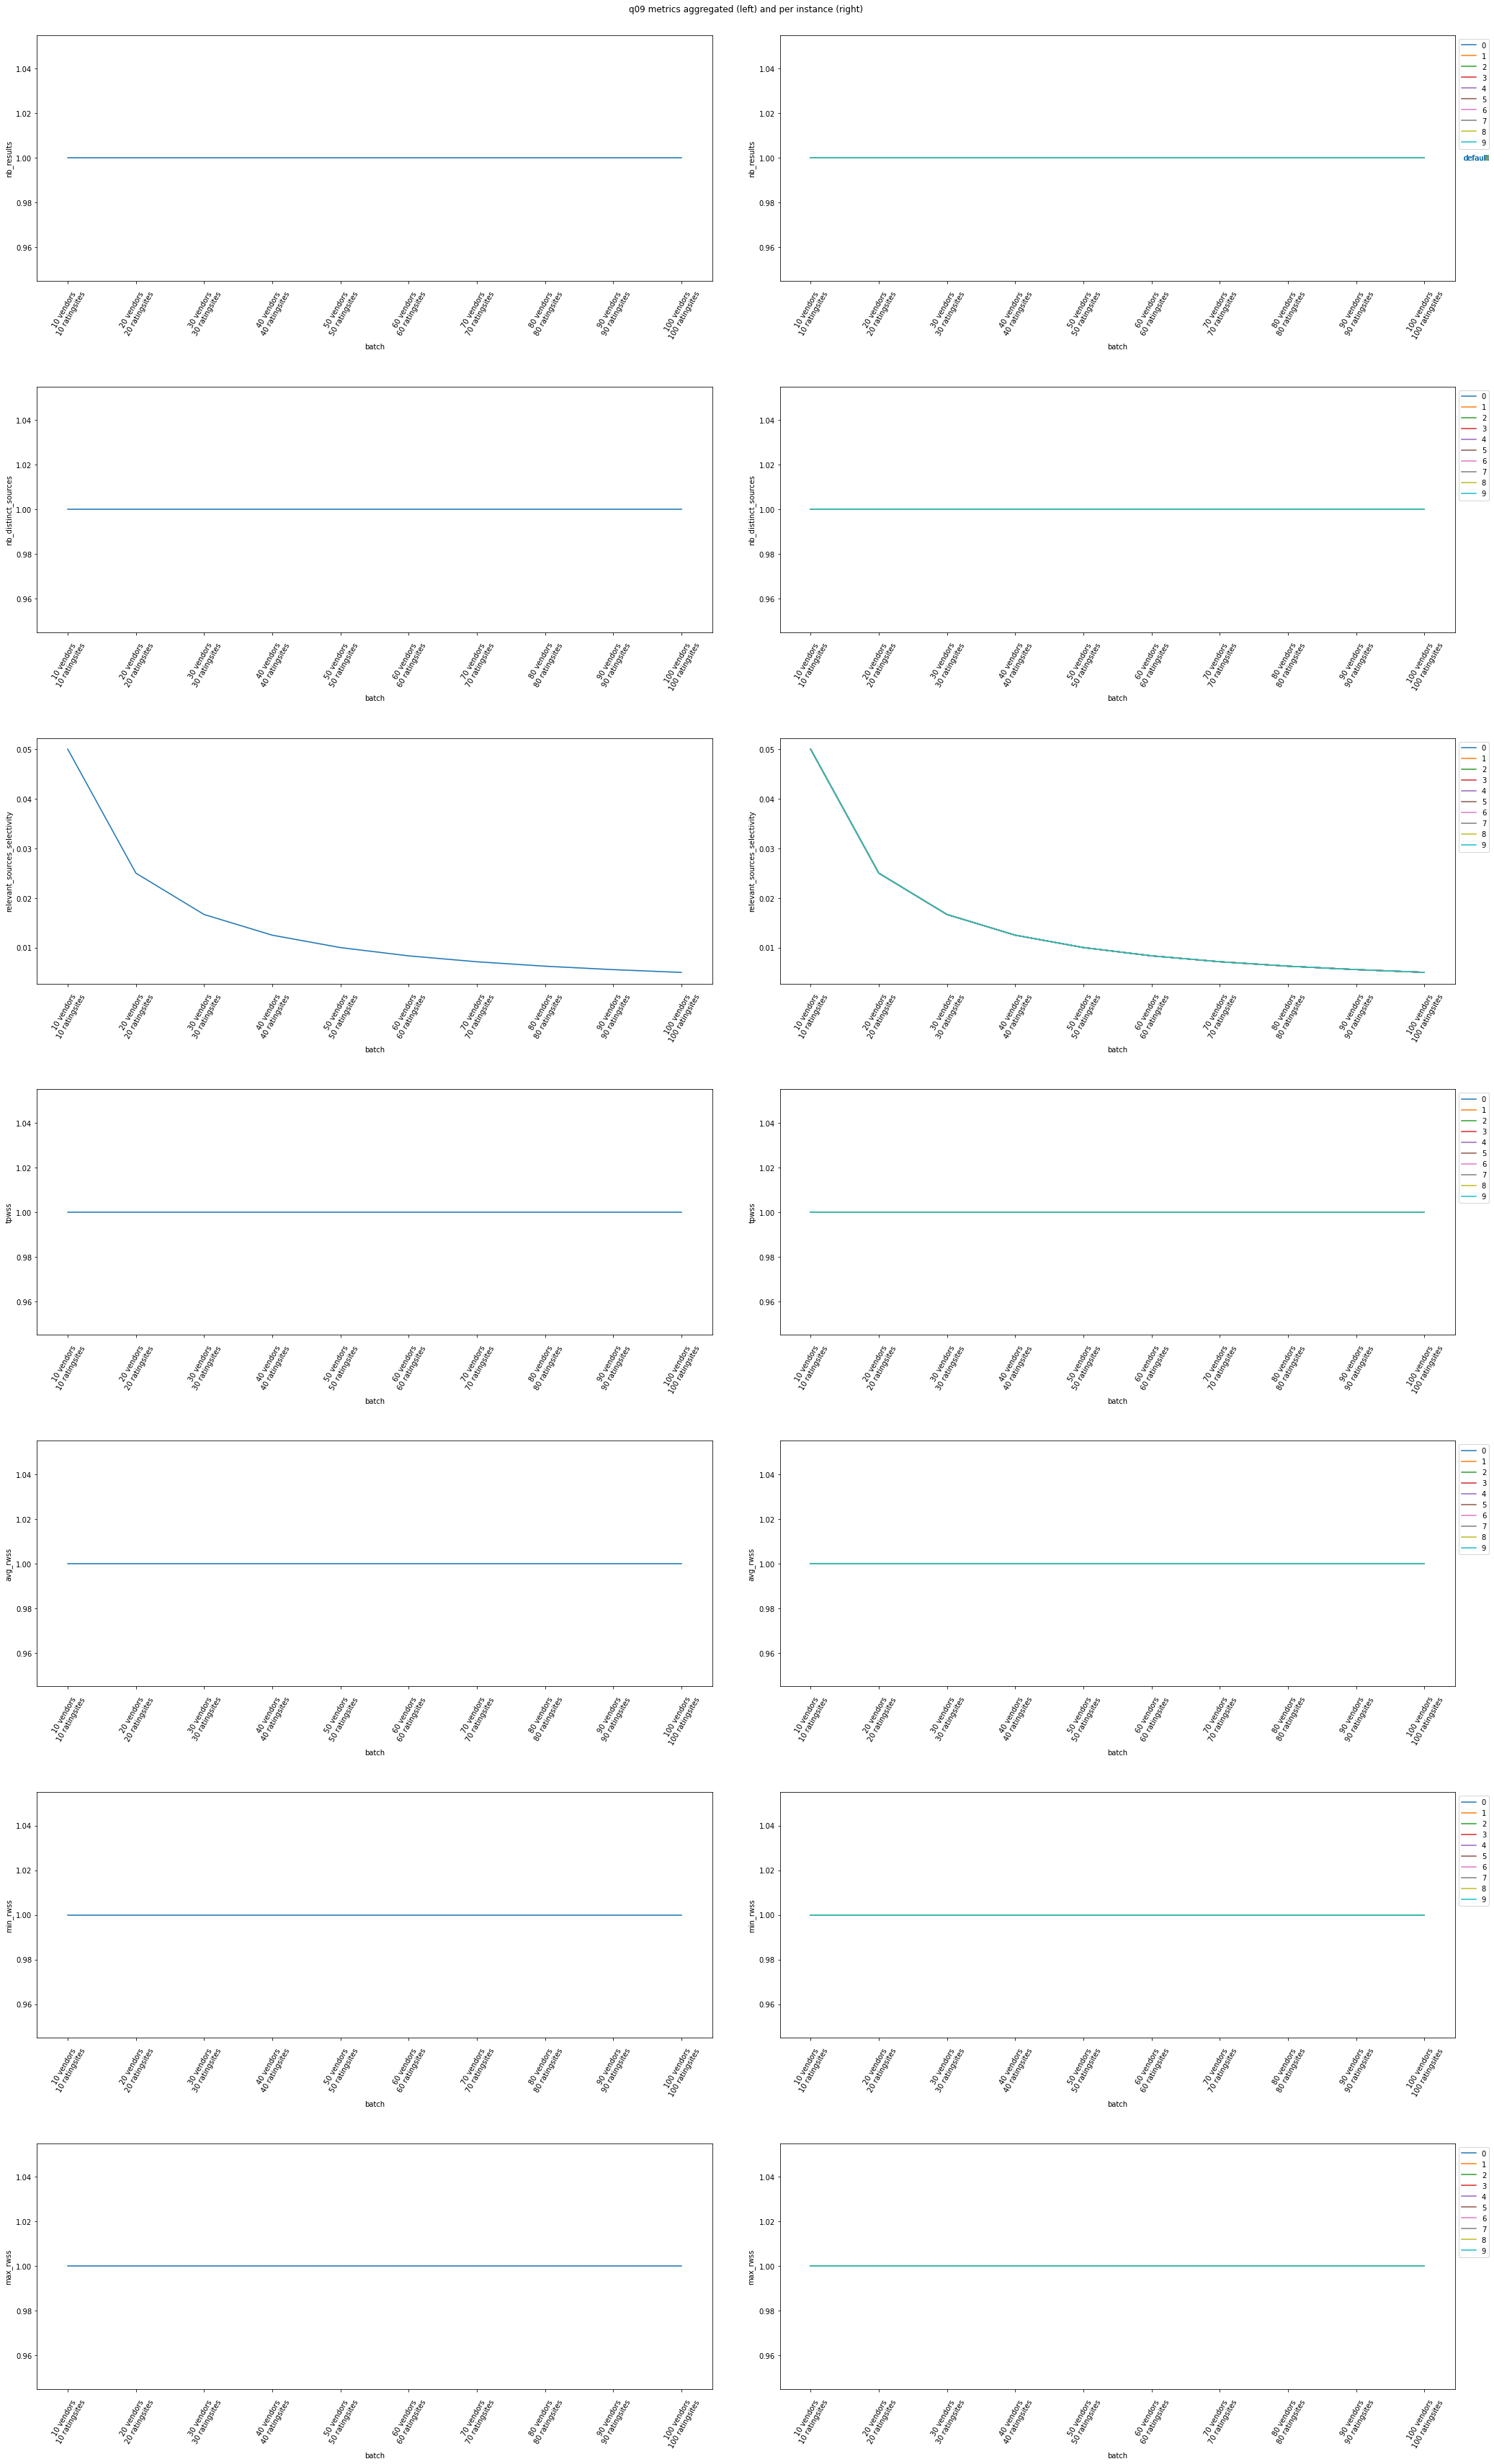

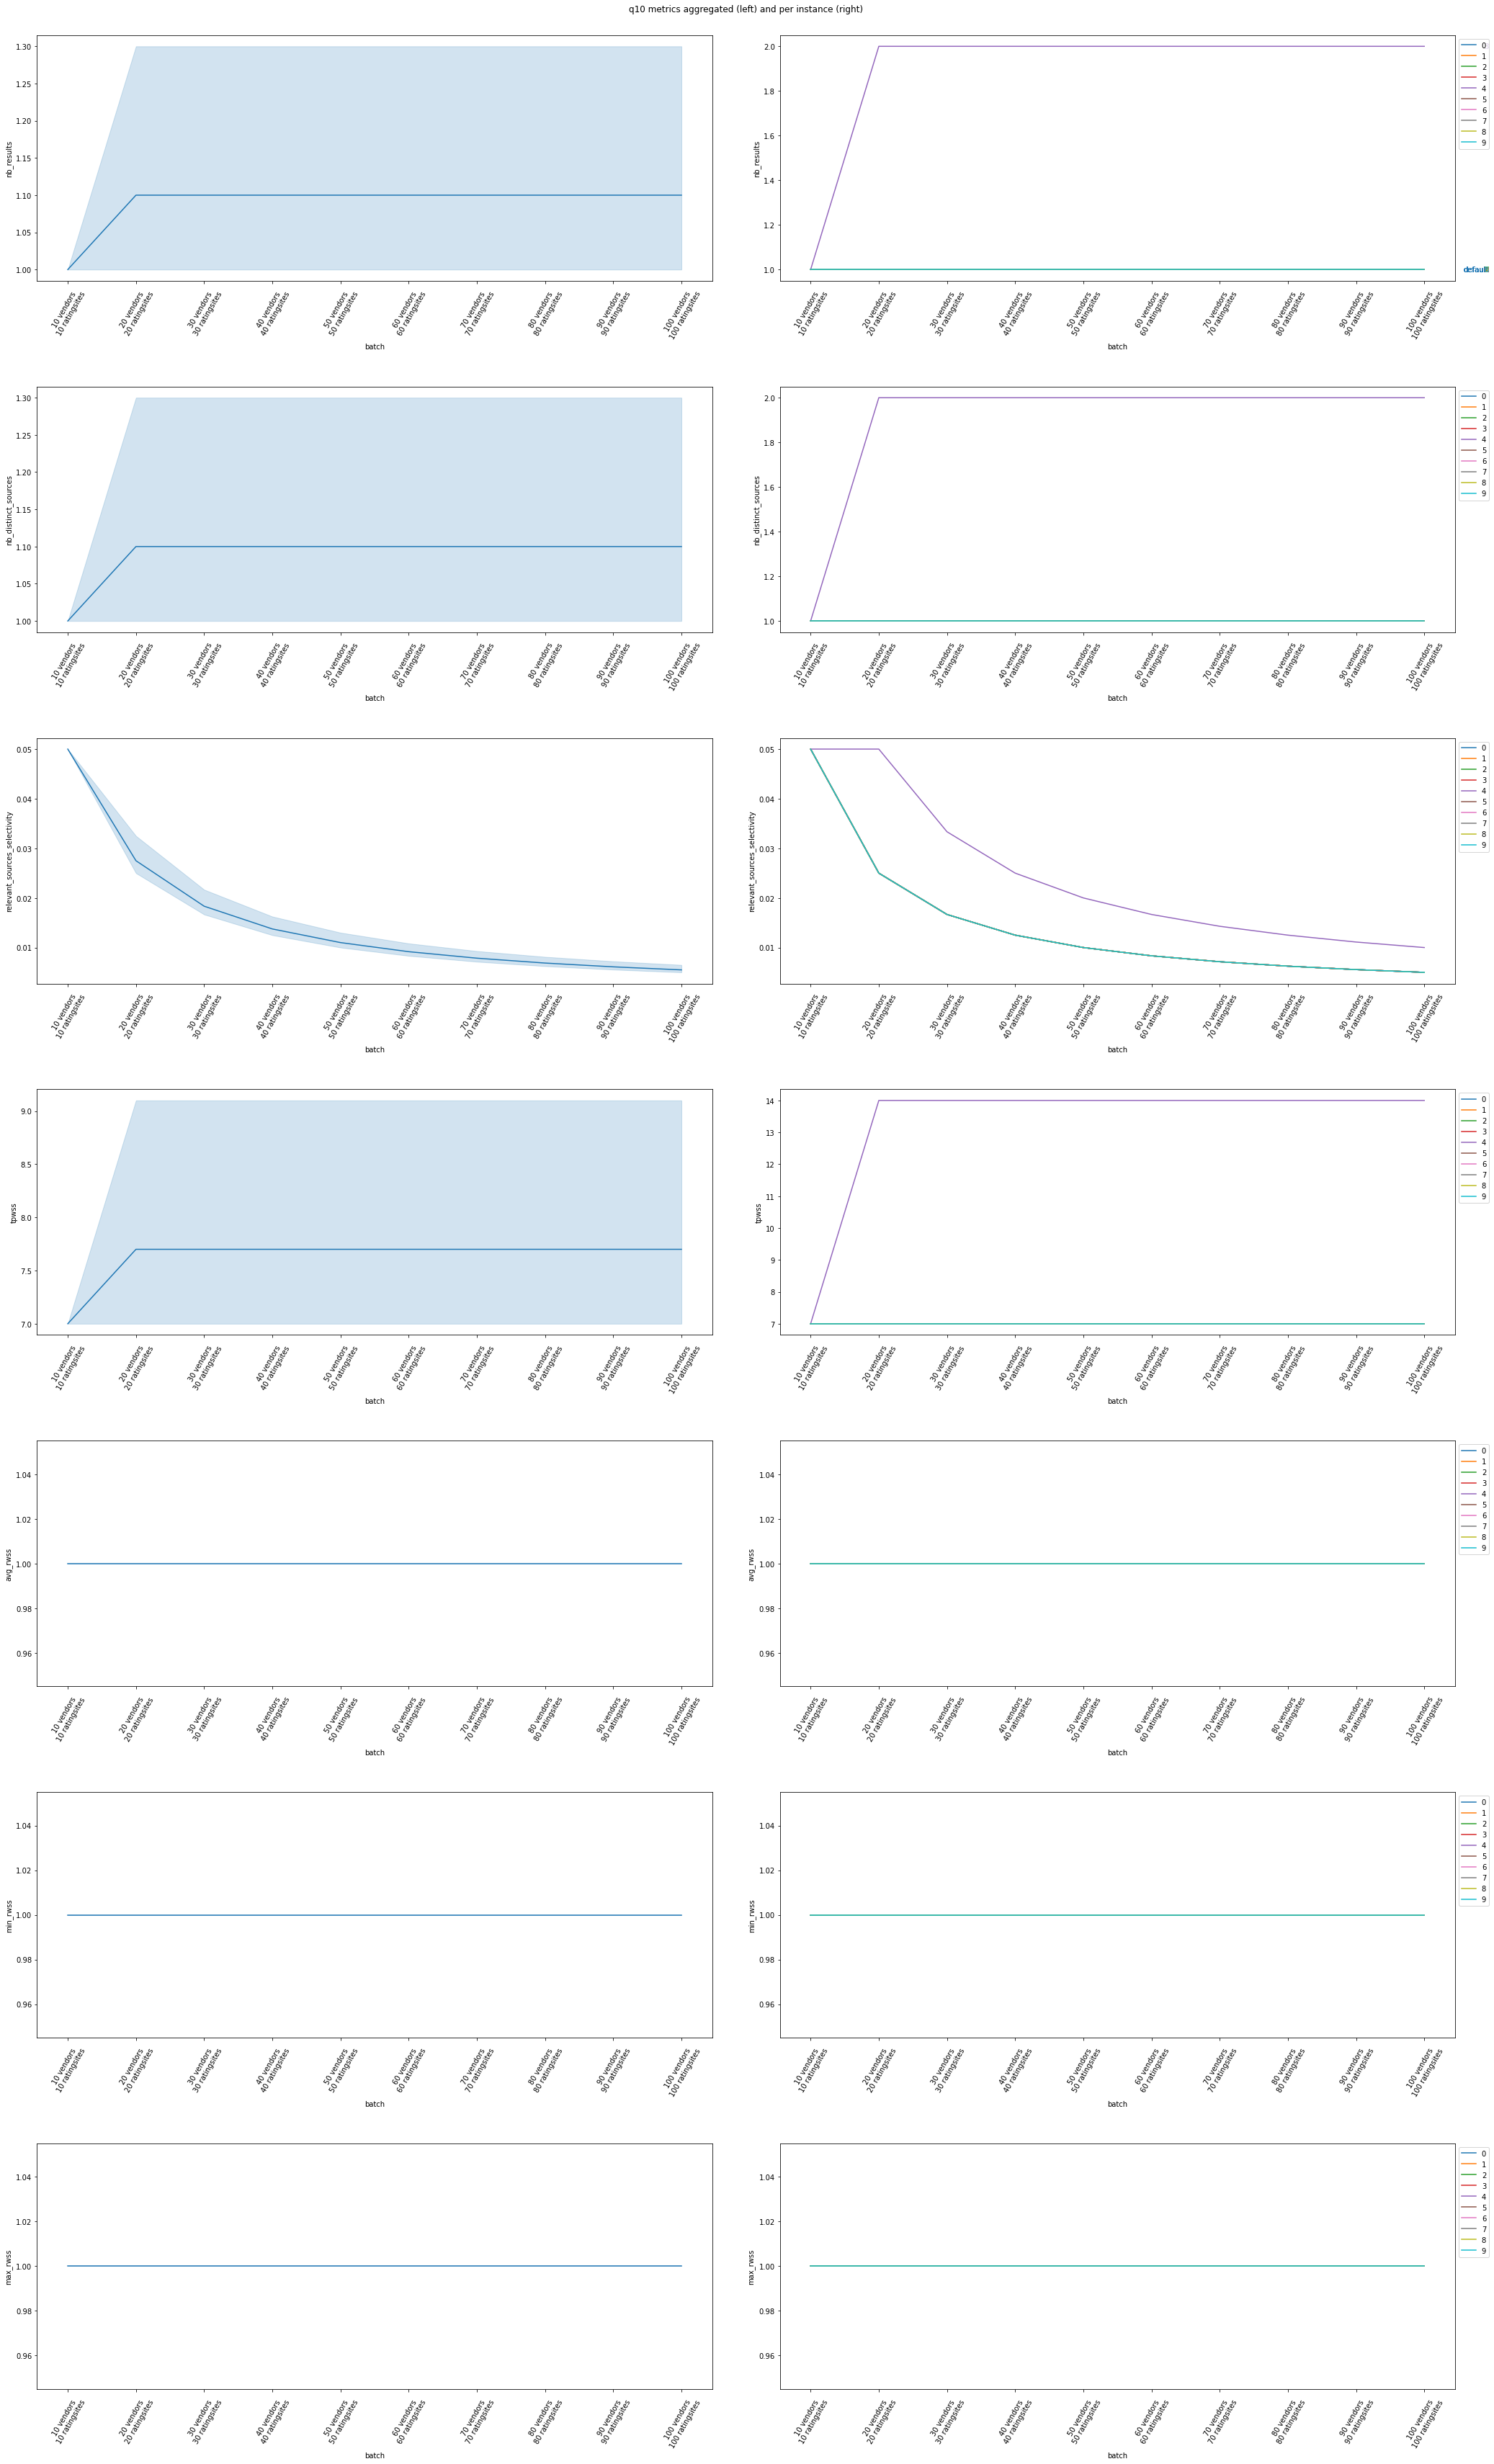

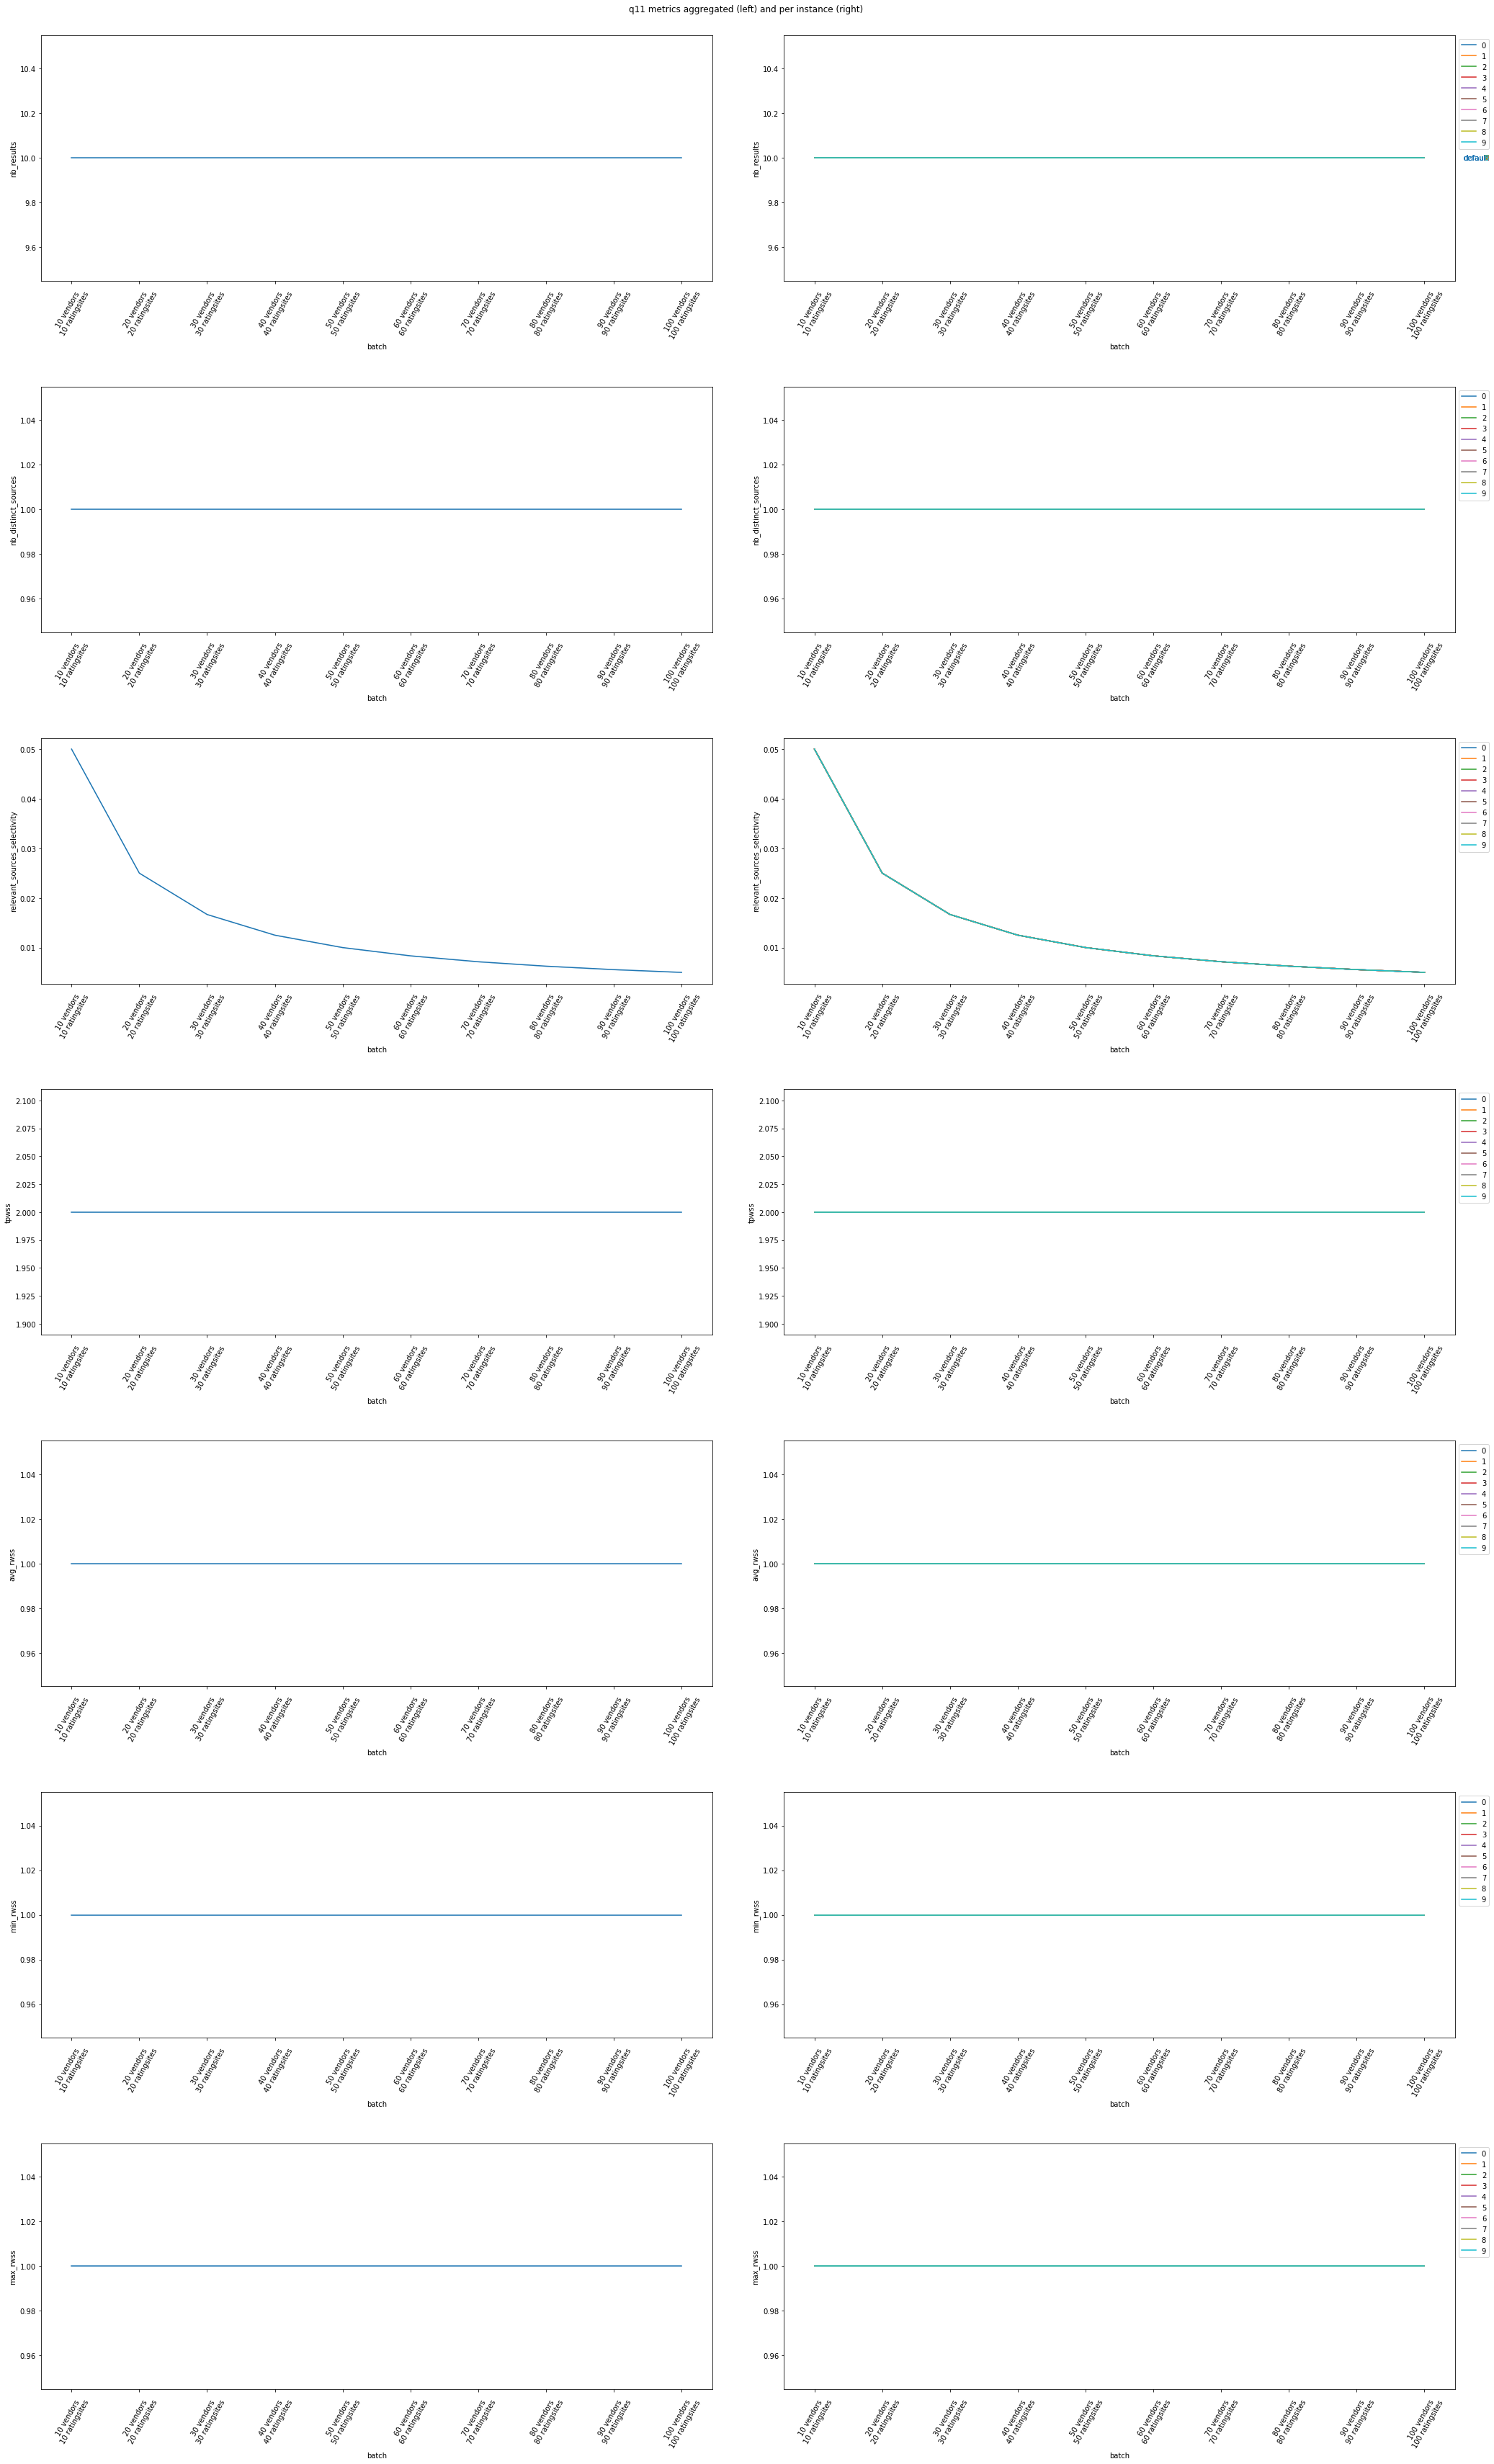

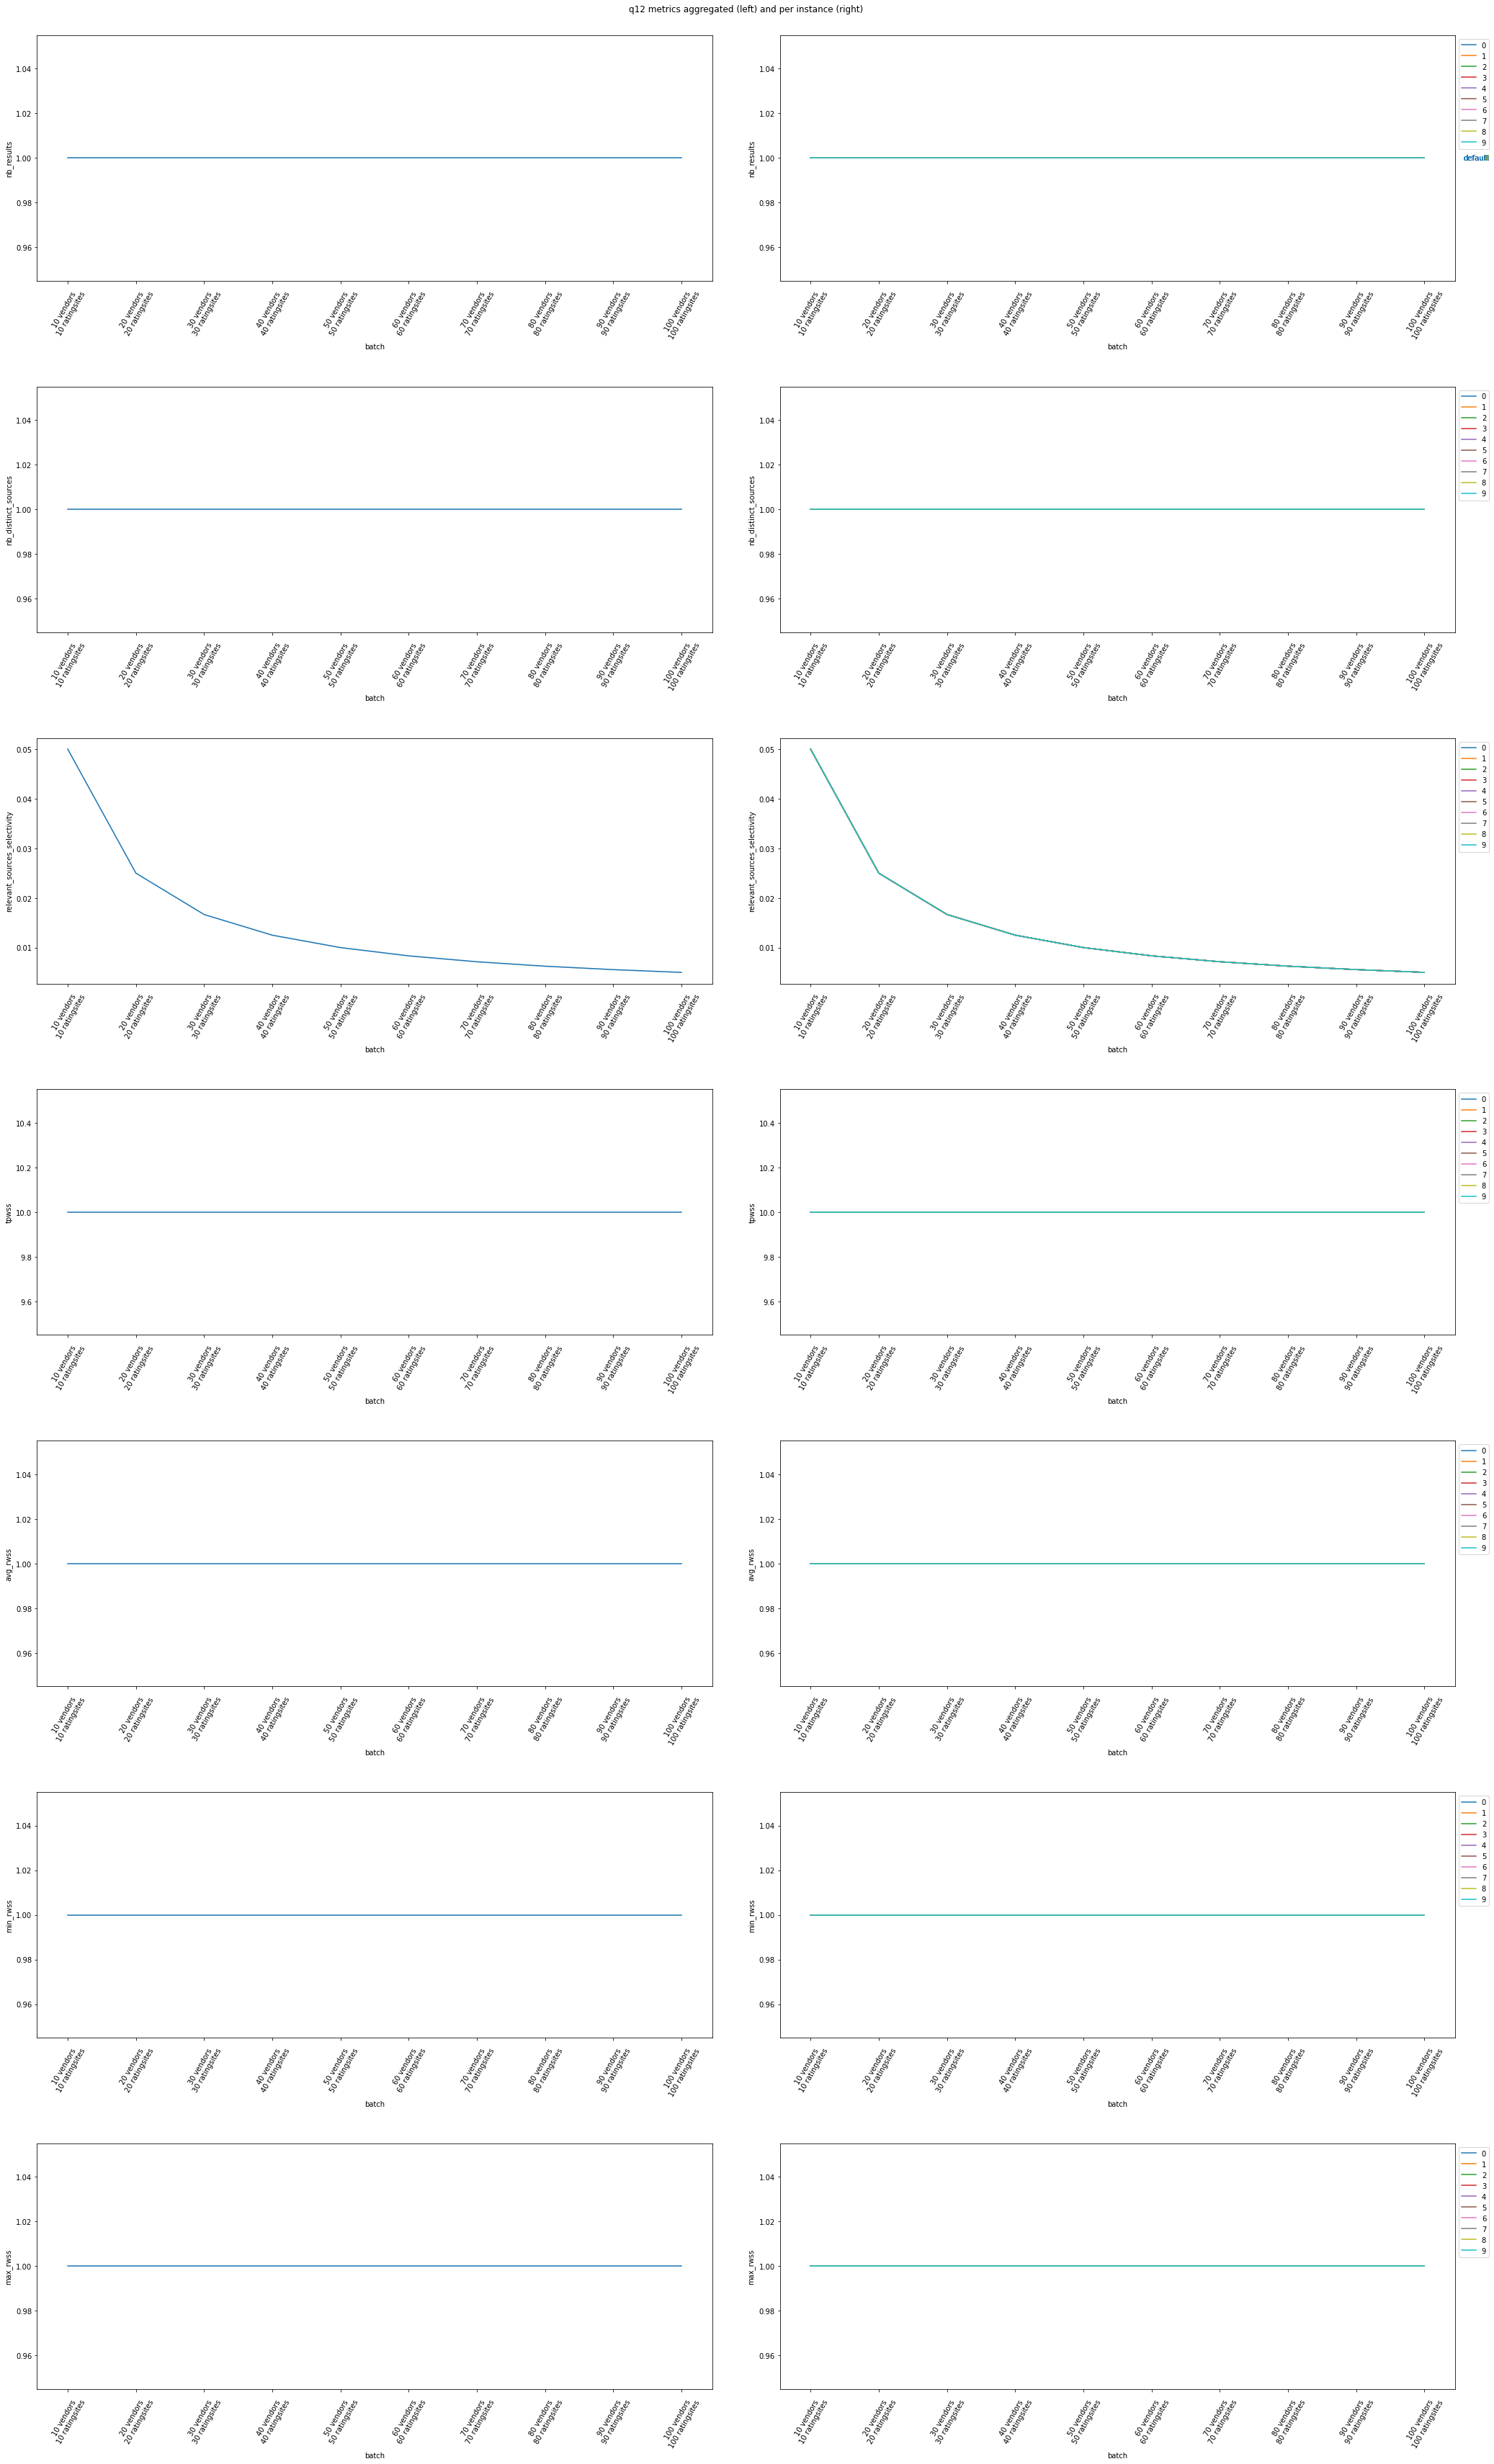

In [ ]:
#@title Line plot showing source selectivity tendency per query template when the number of sources increases

scale = "linear" #@param ["linear", "log"]

# n_queries = generation_metrics["query"].nunique()
# fig, axes = plt.subplots(1, n_queries, figsize=(100, 10), sharey=True)
# fig.suptitle('Line plot showing source selectivity tendency per query template when the number of sources increases')

n_metrics = len(plot_metrics)

import itertools
import matplotlib
from matplotlib.lines import Line2D

mks = itertools.cycle(list(Line2D.markers.keys()))
markers = [next(mks) for i in generation_metrics["instance"].unique()]

for qid, query in enumerate(generation_metrics["query"].unique()):
    data = generation_metrics.query(f'`query` == {repr(query)}')

    fig, axes = plt.subplots(n_metrics, 2, figsize=(30, n_metrics * 7), sharex=False)
    fig.suptitle(f"{query} metrics aggregated (left) and per instance (right) ")

    for ax, plot_metric in enumerate(plot_metrics):
        sns.lineplot(ax=axes[ax, 0], data=data, x="batch", y=plot_metric)
        axes[ax, 0].set_xticks(generation_metrics["batch"].unique())
        axes[ax, 0].set_xticklabels(xticks, rotation=60)
        axes[ax, 0].set_yscale(scale)
        #axes[ax, 0].legend(loc = 2, bbox_to_anchor = (1,1))

        sns.lineplot(ax=axes[ax, 1], data=data, x="batch", y=plot_metric, hue="instance")
        axes[ax, 1].set_xticks(generation_metrics["batch"].unique())
        axes[ax, 1].set_xticklabels(xticks, rotation=60)
        axes[ax, 1].set_yscale(scale)
        lines_labels = ["default"] + data["instance"].unique().tolist()
        for l, label in zip(axes[0, 1].lines, lines_labels):
            y = l.get_ydata()
            if len(y)>0:
                axes[0, 1].annotate(label, xy=(1.05,y[-1]), xycoords=('axes fraction', 'data'), 
                            ha='right', va='center', color=l.get_color())
        axes[ax, 1].legend(loc = 2, bbox_to_anchor = (1,1))

    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    fig.tight_layout(pad=5)
    plt.show()

## Which queries pose challenge to source selection ?

In [ ]:
#@title Bar plot comparing source selectivity amongst queries

#g = sns.barplot(data=generation_metrics, x="query", y="relevant_sources_selectivity")
# plt.show()

for batch in generation_metrics["batch"].unique():
    data = generation_metrics.query(f"`batch` == {repr(batch)}").groupby("query")["relevant_sources_selectivity"].mean()  # data underlying bar plot in question
    pal = sns.color_palette("viridis", n_colors=len(data))
    rank = data.argsort().argsort()  # http://stackoverflow.com/a/6266510/1628638
    g = sns.barplot(x=data.index, y=data, palette=np.array(pal)[rank], ci="sd")
    
    g.set_title(f"Comparing selectivity amongst queries of batch {batch}")
    g.set_yscale("log")
    plt.legend(loc = 2, bbox_to_anchor = (1,1))
    plt.show()

In [ ]:
#@title Ranking of queries by source selectivity across batches (average)
generation_metrics.groupby(["query"])["relevant_sources_selectivity"].mean().sort_values(ascending=False)

# Other experiments

## Hypergraph

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()

G.add_node("tp1", name="tp1", color="orange")
G.add_node("tp2", name="tp2", color="orange")
G.add_node("tp3_tp9", name="tp3_tp9", color="red")
G.add_node("tp4", name="tp4", color="orange")
G.add_node("tp5", name="tp5", color="orange")
G.add_node("tp6", name="tp6", color="orange")
G.add_node("tp7", name="tp7", color="orange")
G.add_node("tp8", name="tp8", color="orange")
G.add_node("tp10", name="tp10", color="orange")
G.add_node("tp11", name="tp11", color="orange")
G.add_node("S1", name="S1", color="blue")
G.add_node("S2", name="S2", color="blue")

cmap = []
for node in G:
    if node in ["S1", "S2"]:
        cmap.append("blue")
    elif node == "tp3_tp9":
        cmap.append("red")
    else:
        cmap.append("orange")

# First part

G.add_edge("S1", "tp1", weight=2, source="v0")
G.add_edge("S1", "tp1", weight=2, source="r7")

G.add_edge("S1", "tp2", weight=2, source="v0")
G.add_edge("S1", "tp2", weight=2, source="r7")

G.add_edge("S1", "tp4", weight=2, source="v0")
G.add_edge("S1", "tp4", weight=2, source="r7")

G.add_edge("S1", "tp5", weight=2, source="v0")
G.add_edge("S1", "tp5", weight=2, source="r7")

G.add_edge("S1", "tp3_tp9", weight=2, source="v0")
G.add_edge("S1", "tp3_tp9", weight=2, source="r7")

# Second part

G.add_edge("S2", "tp6", weight=2, source="v3")
G.add_edge("S2", "tp6", weight=2, source="r12")

G.add_edge("S2", "tp7", weight=2, source="v3")
G.add_edge("S2", "tp7", weight=2, source="r12")

G.add_edge("S2", "tp8", weight=2, source="v3")
G.add_edge("S2", "tp8", weight=2, source="r12")

G.add_edge("S2", "tp10", weight=2, source="v3")
G.add_edge("S2", "tp10", weight=2, source="r12")

G.add_edge("S2", "tp11", weight=2, source="v3")
G.add_edge("S2", "tp11", weight=2, source="r12")

G.add_edge("S2", "tp3_tp9", weight=2, source="v3")
G.add_edge("S2", "tp3_tp9", weight=2, source="r12")

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=cmap, with_labels=True)

In [ ]:
#@title Community
import networkx.algorithms.community as nx_comm
communities = nx_comm.louvain_communities(G)
communities

In [ ]:
nx.hits(G)